# Code 8: Approximate Bayesian Computation

In [ ]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
from scipy import stats

from scripts.rf_selector import select_model

In [2]:
az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 300
np.random.seed(1346)

## Fitting a Gaussian the ABC-way

### Figure 8.2

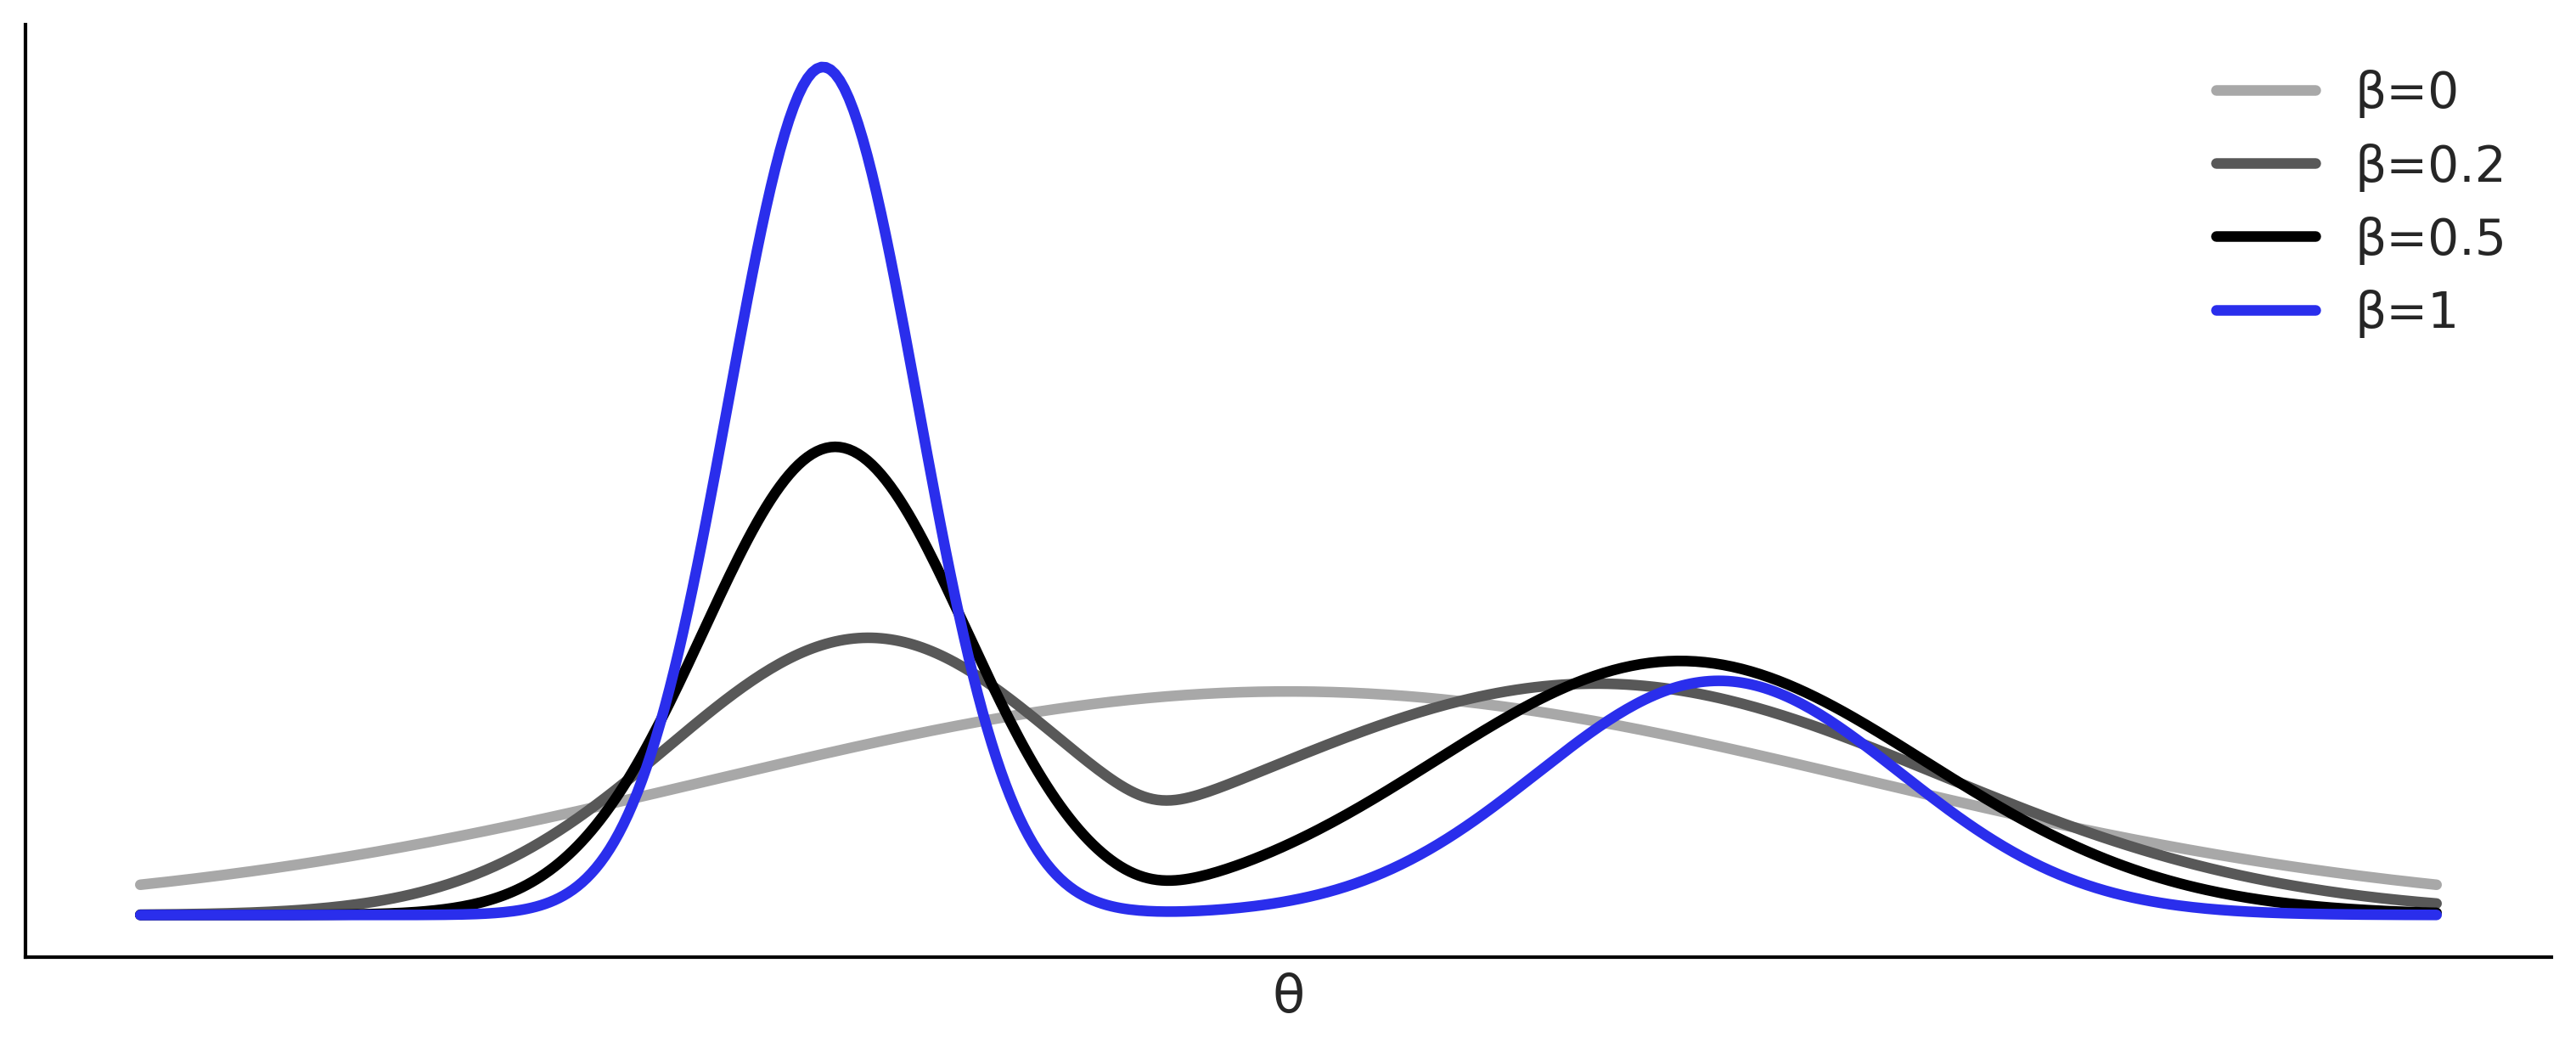

In [3]:
a = stats.norm(-2.5, 0.5)
b = stats.norm(2.5, 1)
c = stats.norm(0, 3)
x = np.linspace(-6, 6, 500)

lpdf = 0.65 * a.pdf(x) + 0.35* b.pdf(x)
ppdf = c.pdf(x)
_, ax = plt.subplots(figsize=(10, 4))
for c, β in zip(["#A8A8A8", "#585858", "#000000", "#2a2eec"],
                [0, 0.2, 0.5, 1]):
    post = ppdf * lpdf**β
    post /= post.sum()
    ax.plot(x, post, lw=3, label=f"β={β}", color=c)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel("θ")
ax.legend()
plt.savefig("img/chp08/smc_tempering.png")

## Fitting a Gaussian the ABC-way

In [4]:
data = np.random.normal(loc=0, scale=1, size=1000)

def normal_sim(rng, a, b, size=1000):
    return rng.normal(a, b, size=size)

### Code 8.2 and Figure 8.3

In [5]:
with pm.Model() as gauss:
    μ = pm.Normal('μ', mu=0, sigma=1)
    σ = pm.HalfNormal('σ', sigma=1)
    s = pm.Simulator('s', normal_sim, params=[μ, σ],
                     distance="gaussian",
                     sum_stat="sort",          
                     epsilon=1,
                     observed=data)
    trace_g = pm.sample_smc()

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


In [6]:
az.summary(trace_g)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
μ -0.062  0.045  -0.143    0.022      0.001      0.0    6690.0    6496.0   
σ  0.997  0.039   0.921    1.068      0.000      0.0    7806.0    7309.0   

   r_hat  
μ    1.0  
σ    1.0

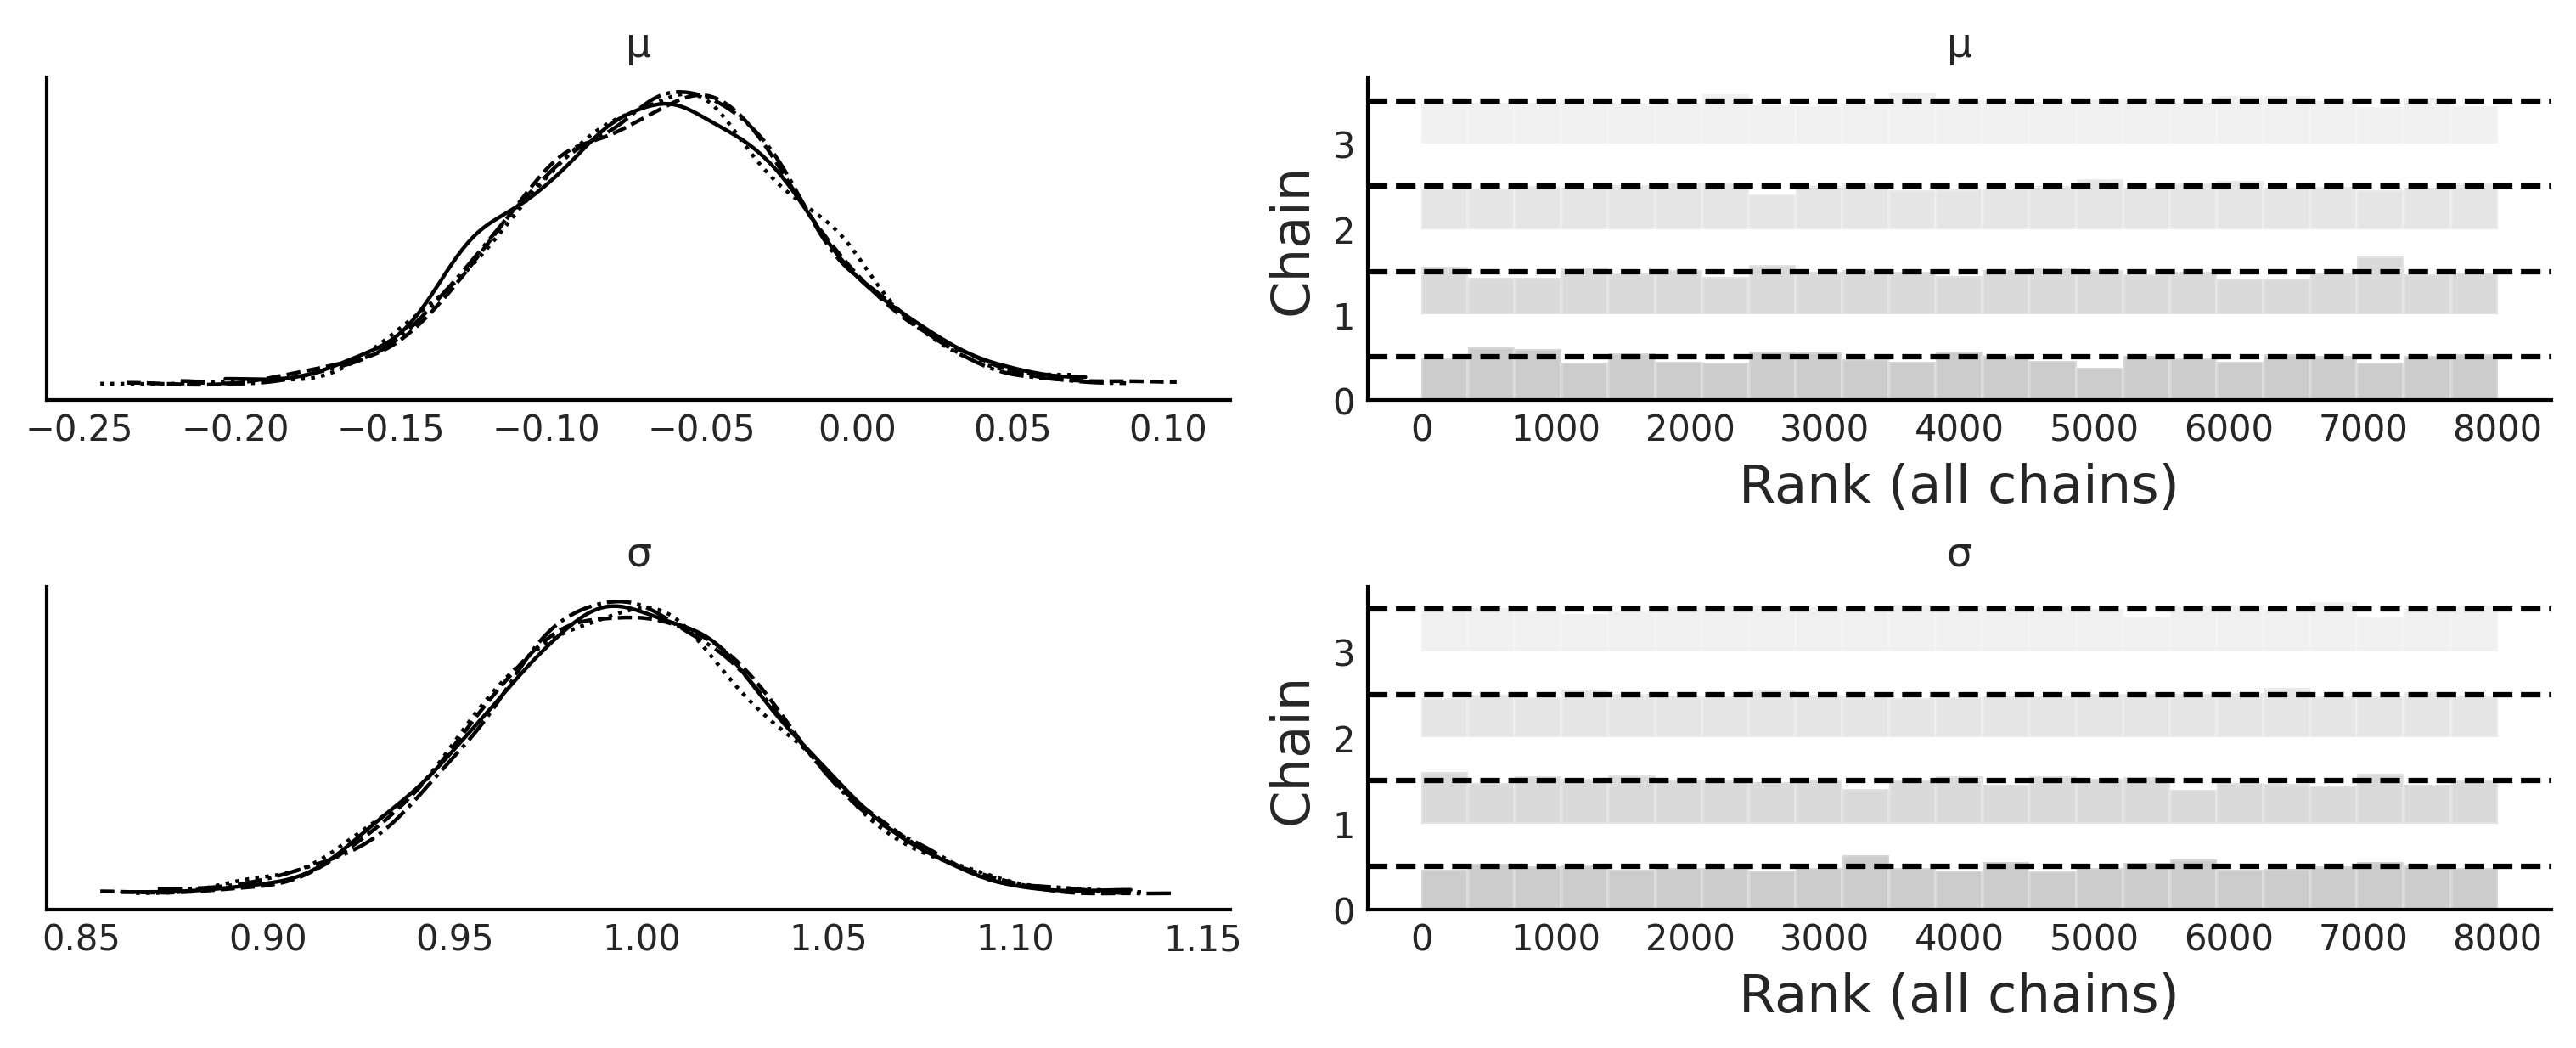

In [7]:
az.plot_trace(trace_g, kind="rank_bars", figsize=(10, 4));
plt.savefig('img/chp08/trace_g.png')

## Choosing the Distance Function, $\epsilon$ and the Summary Statistics

### Codes 8.4, 8.5, 8.6, 8.7, and 8.8

In [8]:
with pm.Model() as gauss_001:
    μ = pm.Normal('μ', mu=0, sigma=1)
    σ = pm.HalfNormal('σ', sigma=1)
    s = pm.Simulator('s', normal_sim, params=[μ, σ],
                     sum_stat="sort",
                     epsilon=0.1,
                     observed=data)
    idata_g_001 = pm.sample_smc()
    idata_g_001.extend(pm.sample_posterior_predictive(idata_g_001))

with pm.Model() as gauss_01:
    μ = pm.Normal('μ', mu=0, sigma=1)
    σ = pm.HalfNormal('σ', sigma=1)
    s = pm.Simulator('s', normal_sim, params=[μ, σ],
                     sum_stat="sort",
                     epsilon=1,
                     observed=data)
    idata_g_01 = pm.sample_smc()
    idata_g_01.extend(pm.sample_posterior_predictive(idata_g_01))

    
with pm.Model() as gauss_02:
    μ = pm.Normal('μ', mu=0, sigma=1)
    σ = pm.HalfNormal('σ', sigma=1)
    s = pm.Simulator('s', normal_sim, params=[μ, σ],
                     sum_stat="sort",
                     epsilon=2,
                     observed=data)
    idata_g_02 = pm.sample_smc()
    idata_g_02.extend(pm.sample_posterior_predictive(idata_g_02))

with pm.Model() as gauss_05:
    μ = pm.Normal('μ', mu=0, sigma=1)
    σ = pm.HalfNormal('σ', sigma=1)
    s = pm.Simulator('s', normal_sim, params=[μ, σ],
                     sum_stat="sort",
                     epsilon=5,
                     observed=data)
    idata_g_05 = pm.sample_smc()
    idata_g_05.extend(pm.sample_posterior_predictive(idata_g_05))
    
with pm.Model() as gauss_10:
    μ = pm.Normal('μ', mu=0, sigma=1)
    σ = pm.HalfNormal('σ', sigma=1)
    s = pm.Simulator('s', normal_sim, params=[μ, σ],
                     sum_stat="sort",
                     epsilon=10,
                     observed=data)
    idata_g_10 = pm.sample_smc()
    idata_g_10.extend(pm.sample_posterior_predictive(idata_g_10))


with pm.Model() as gauss_NUTS:
    μ = pm.Normal('μ', mu=0, sigma=1)
    σ = pm.HalfNormal('σ', sigma=1)
    s = pm.Normal('s', μ, σ, observed=data)
    idata_g_nuts = pm.sample()

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [s]


Initializing SMC sampler...
Sampling 4 chains in 4 jobs


Sampling: [s]


Initializing SMC sampler...
Sampling 4 chains in 4 jobs


Sampling: [s]


Initializing SMC sampler...
Sampling 4 chains in 4 jobs


/home/osvaldo/proyectos/00_BM/arviz-devs/arviz/arviz/data/base.py:221: UserWarning: More chains (4) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Sampling: [s]


Initializing SMC sampler...
Sampling 4 chains in 4 jobs


/home/osvaldo/proyectos/00_BM/arviz-devs/arviz/arviz/data/base.py:221: UserWarning: More chains (4) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Sampling: [s]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


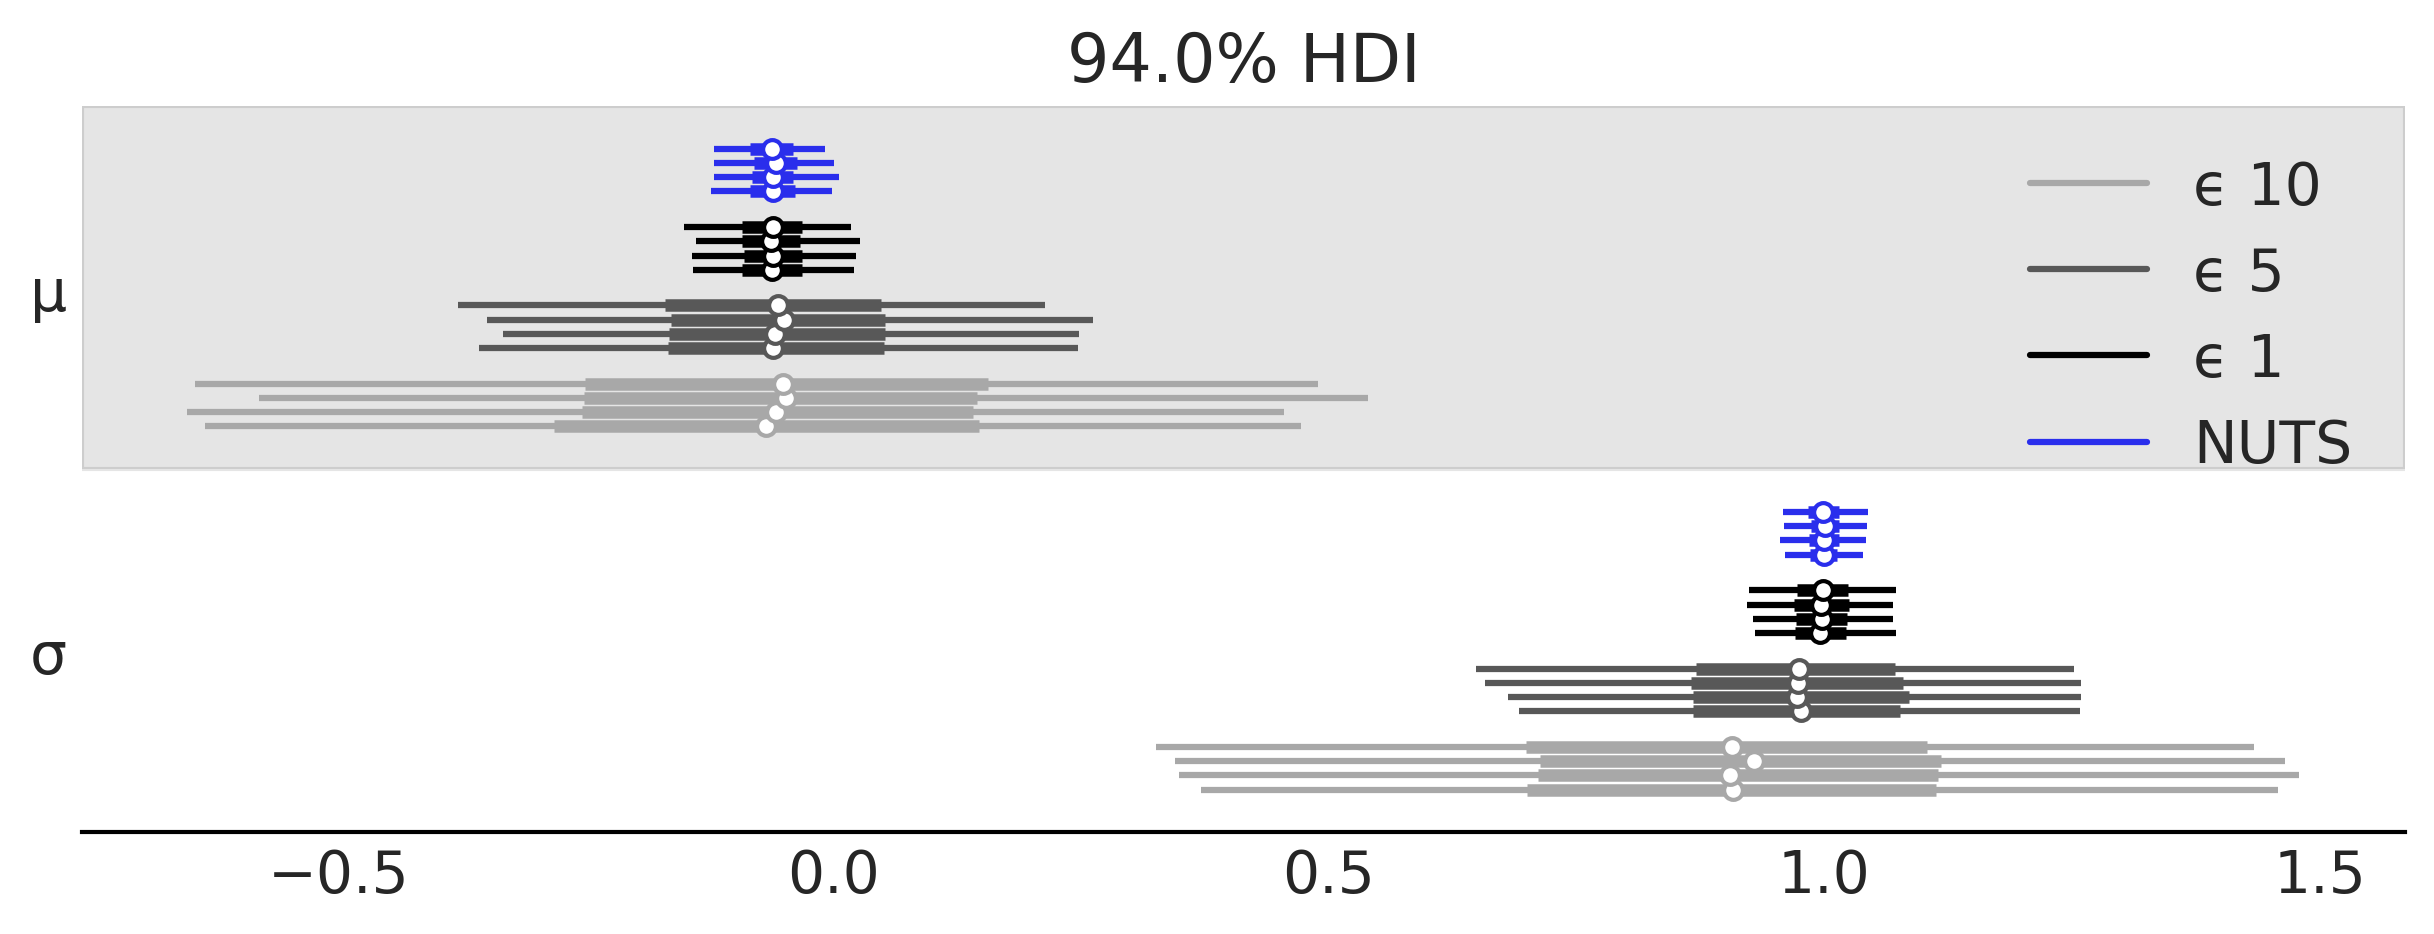

In [9]:
idatas = [idata_g_nuts, idata_g_01, idata_g_05, idata_g_10]
az.plot_forest(idatas, model_names=["NUTS", "ϵ 1", "ϵ 5", "ϵ 10"],
               colors=["#2a2eec", "#000000", "#585858", "#A8A8A8"],
               figsize=(8, 3));
plt.savefig("img/chp08/trace_g_many_eps.png")

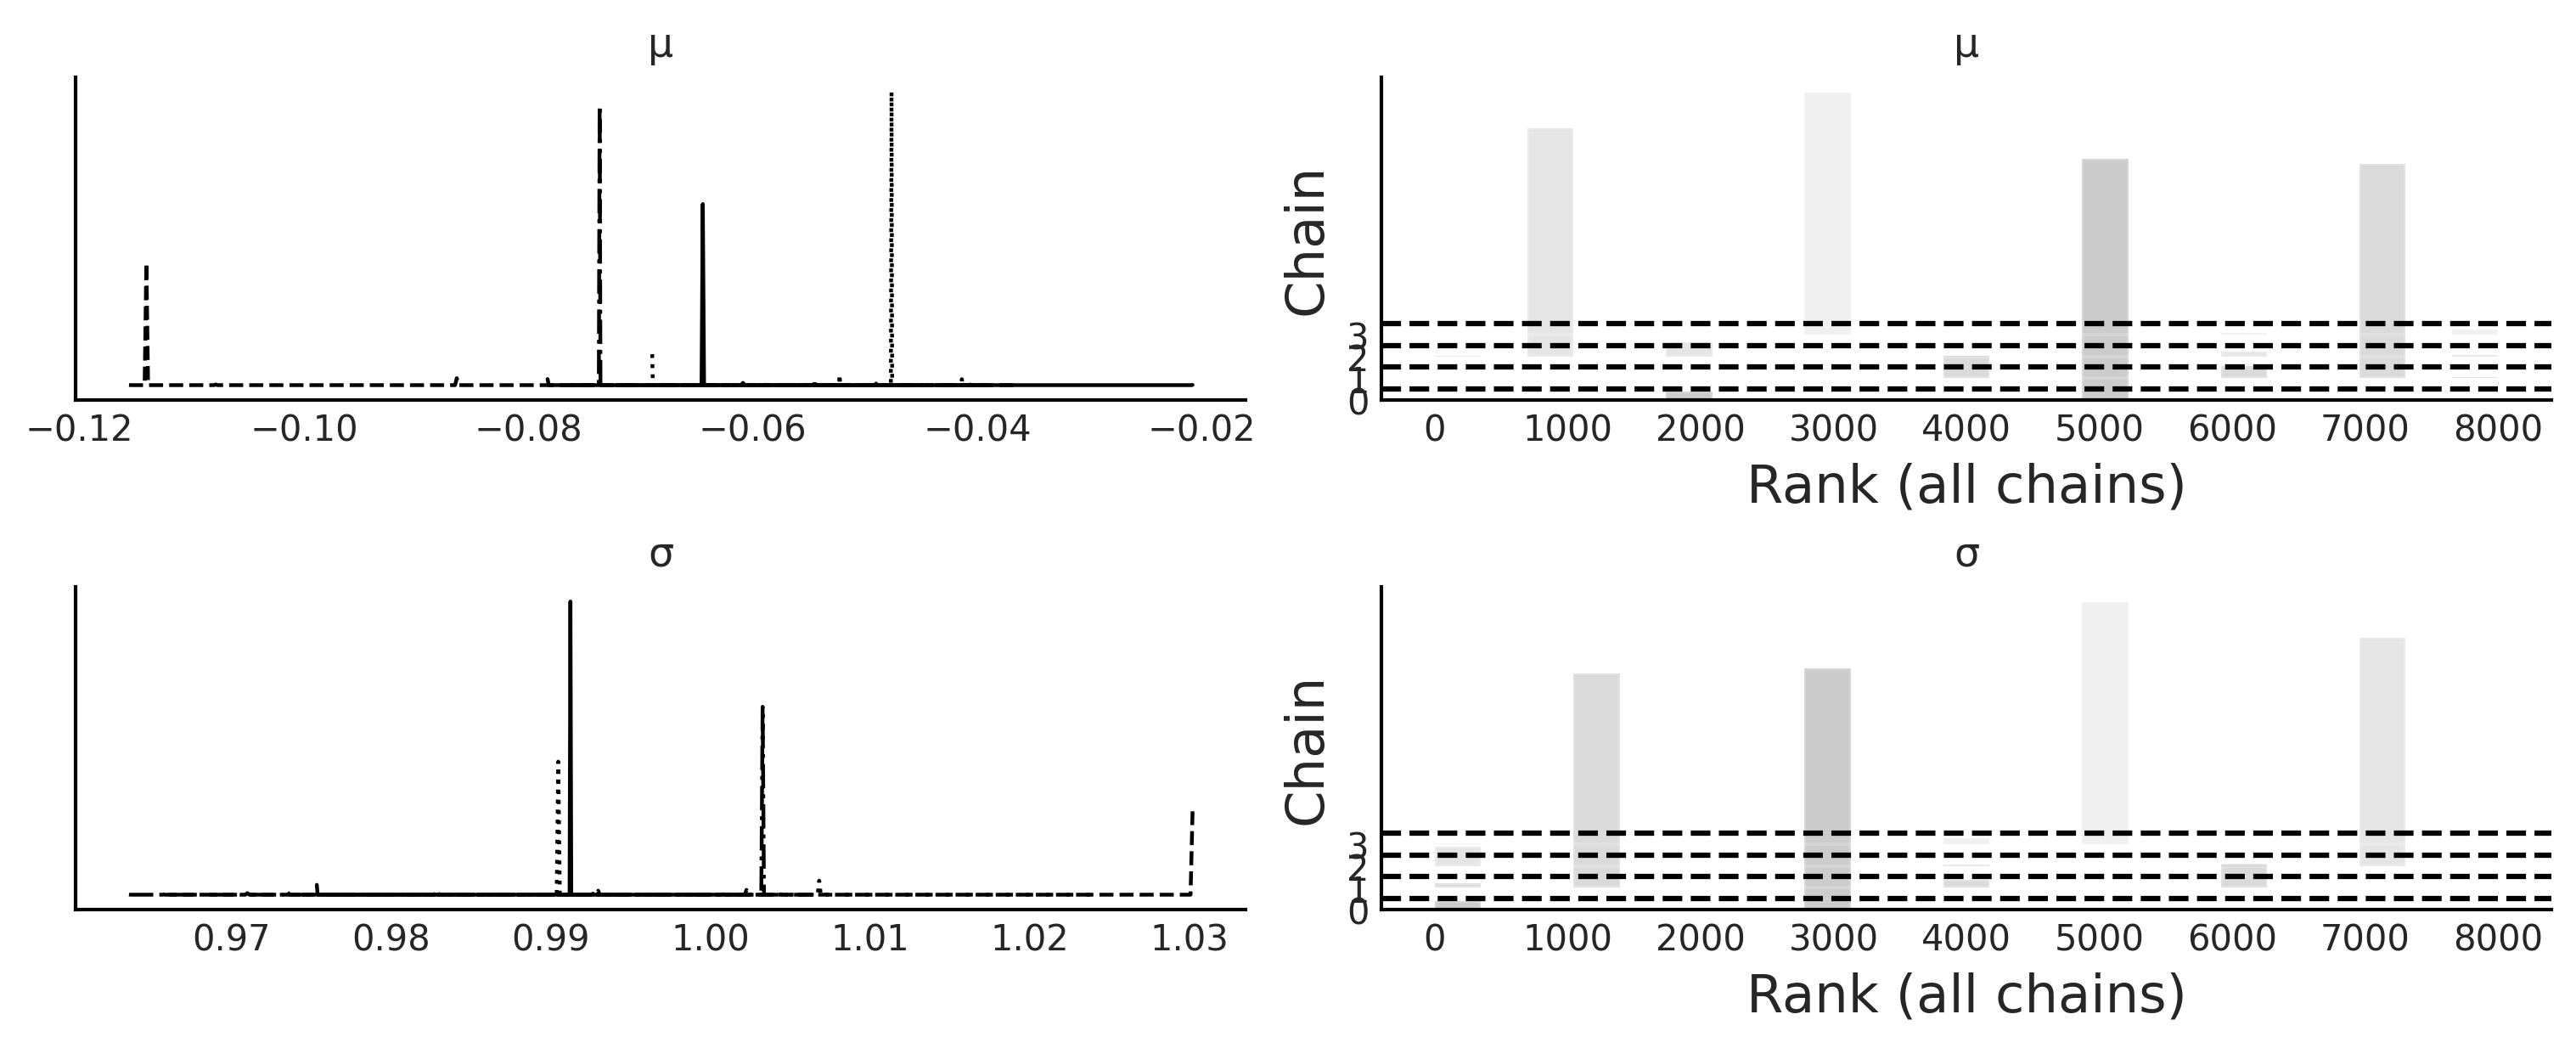

In [10]:
az.plot_trace(idata_g_001, kind="rank_bars", figsize=(10, 4));
plt.savefig("img/chp08/trace_g_eps_too_low.png")

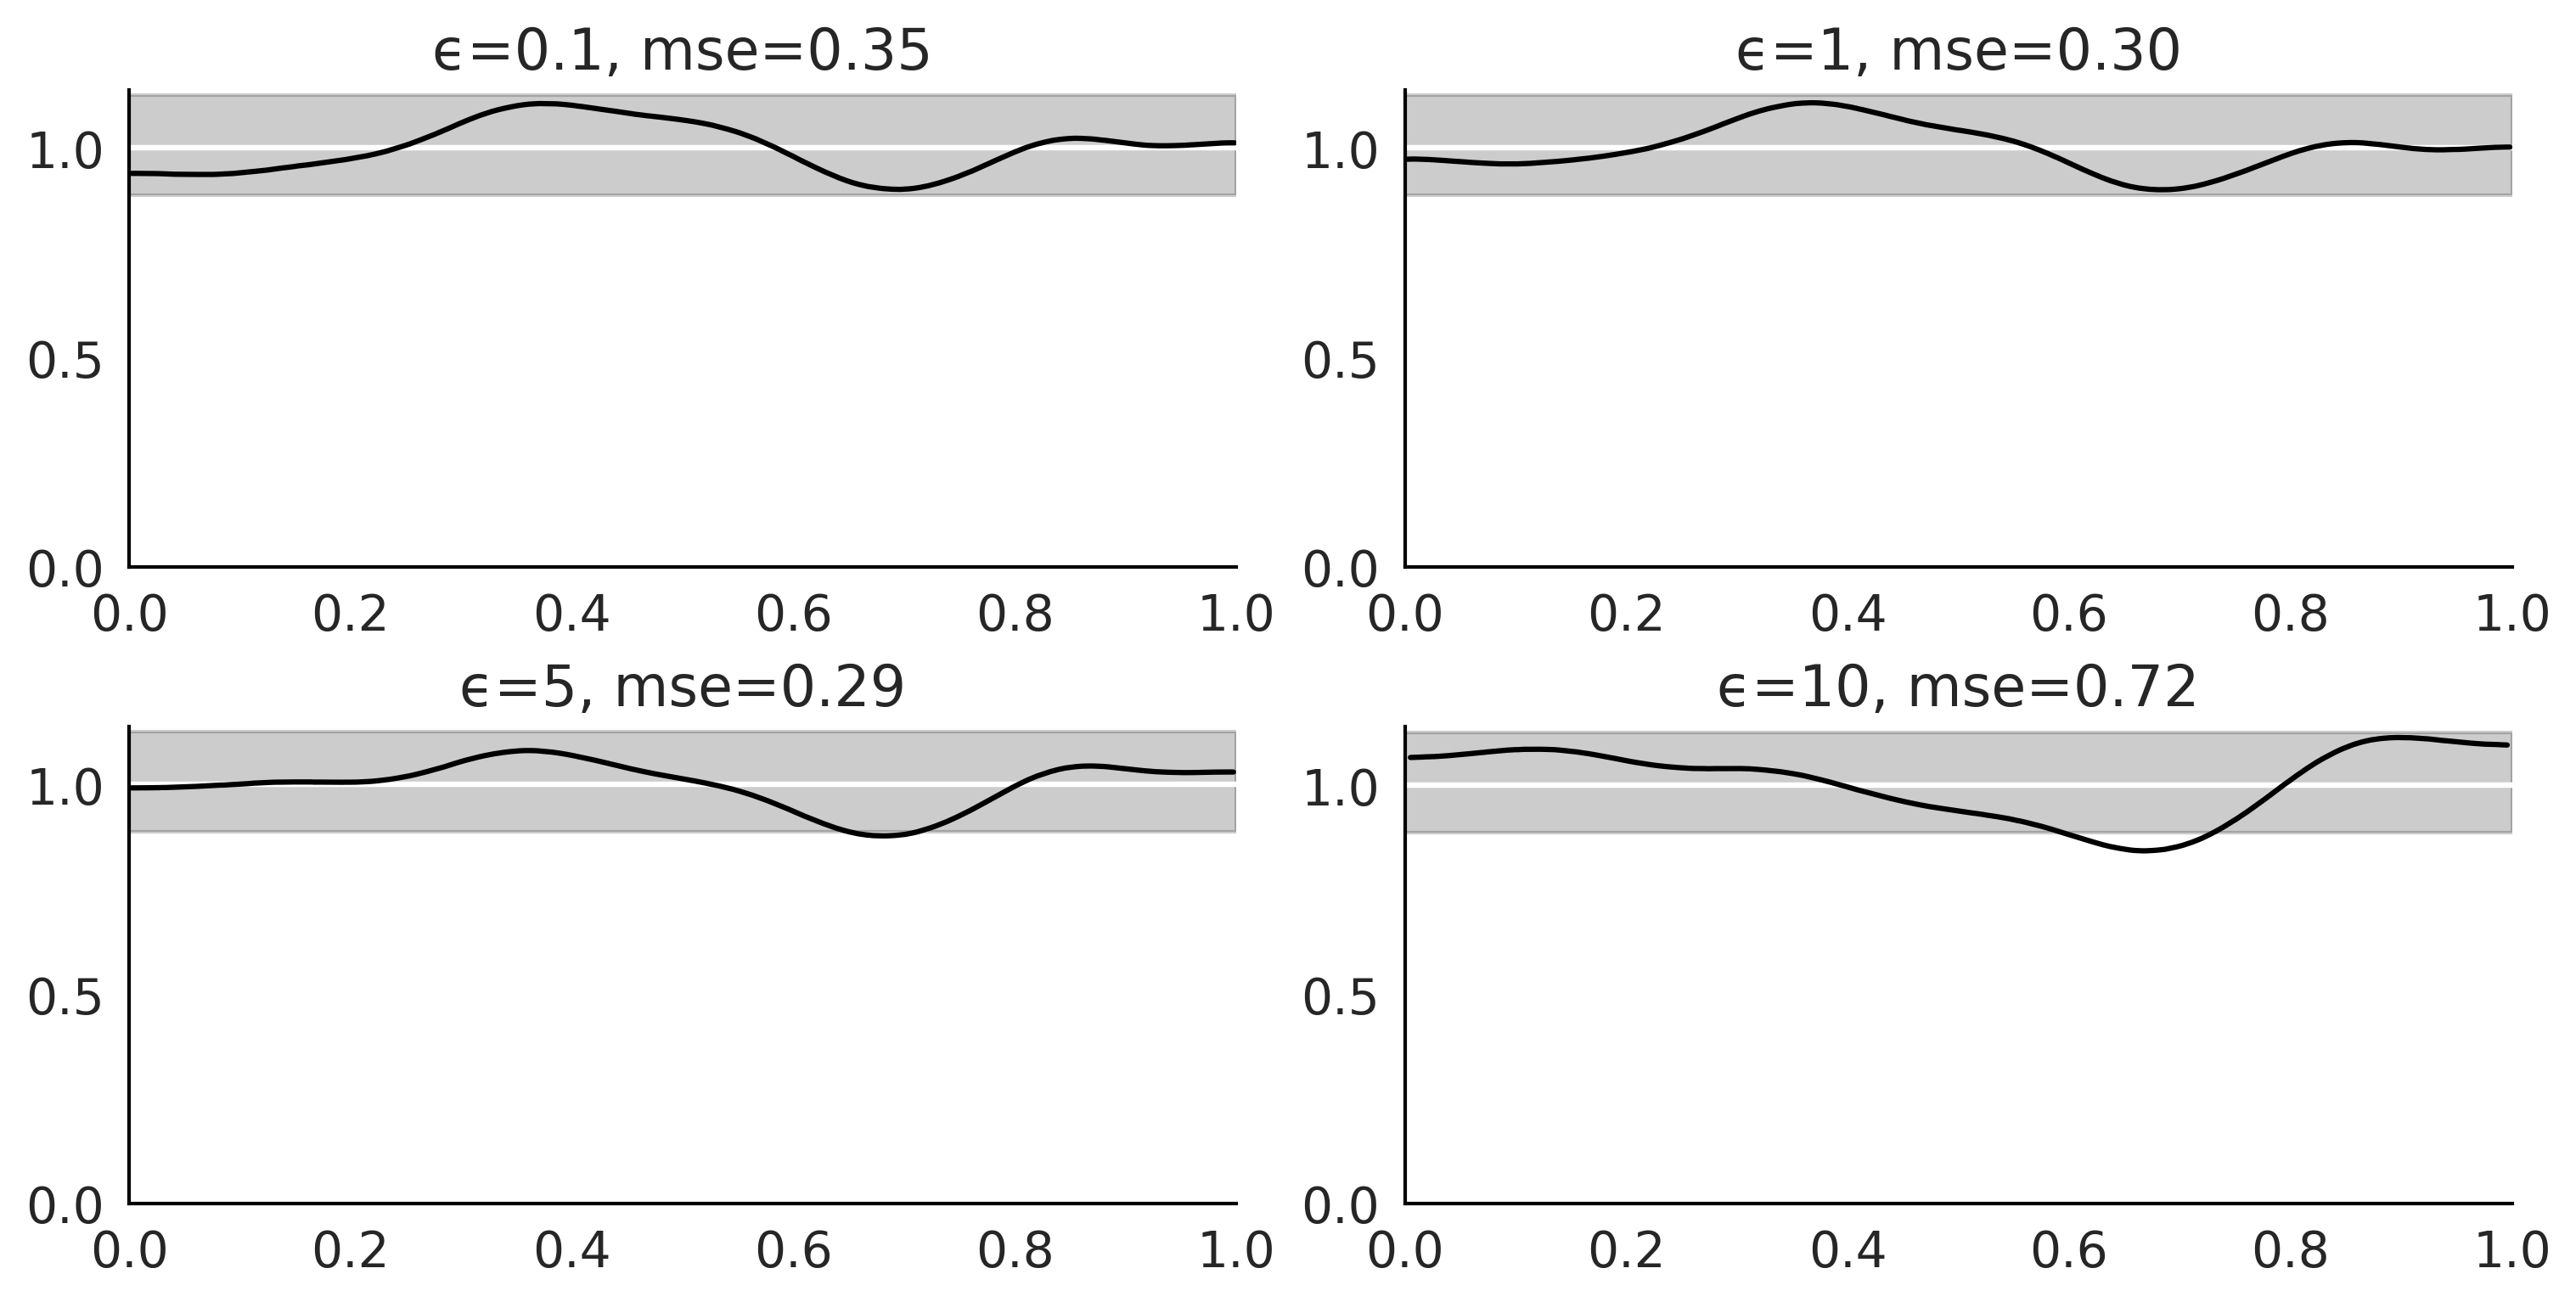

In [11]:
idatas_ = [idata_g_001, idata_g_01, idata_g_05, idata_g_10]
epsilons = [0.1, 1, 5, 10]

_, axes = plt.subplots(2, 2, figsize=(10,5))

for i, ax in enumerate(axes.ravel()):
    pp_vals = idatas_[i].posterior_predictive["s"].values.reshape(8000, -1)
    tstat_pit = np.mean(pp_vals <= data, axis=0)
    _, tstat_pit_dens = az.kde(tstat_pit)

    ax.axhline(1, color="w")
    az.plot_bpv(idatas_[i], kind="u_value", ax=ax, reference="analytical")
    ax.tick_params(axis='both', pad=7)
    ax.set_title(f"ϵ={epsilons[i]}, mse={np.mean((1 - tstat_pit_dens)**2) * 100:.2f}")

plt.savefig("img/chp08/bpv_g_many_eps_00.png")

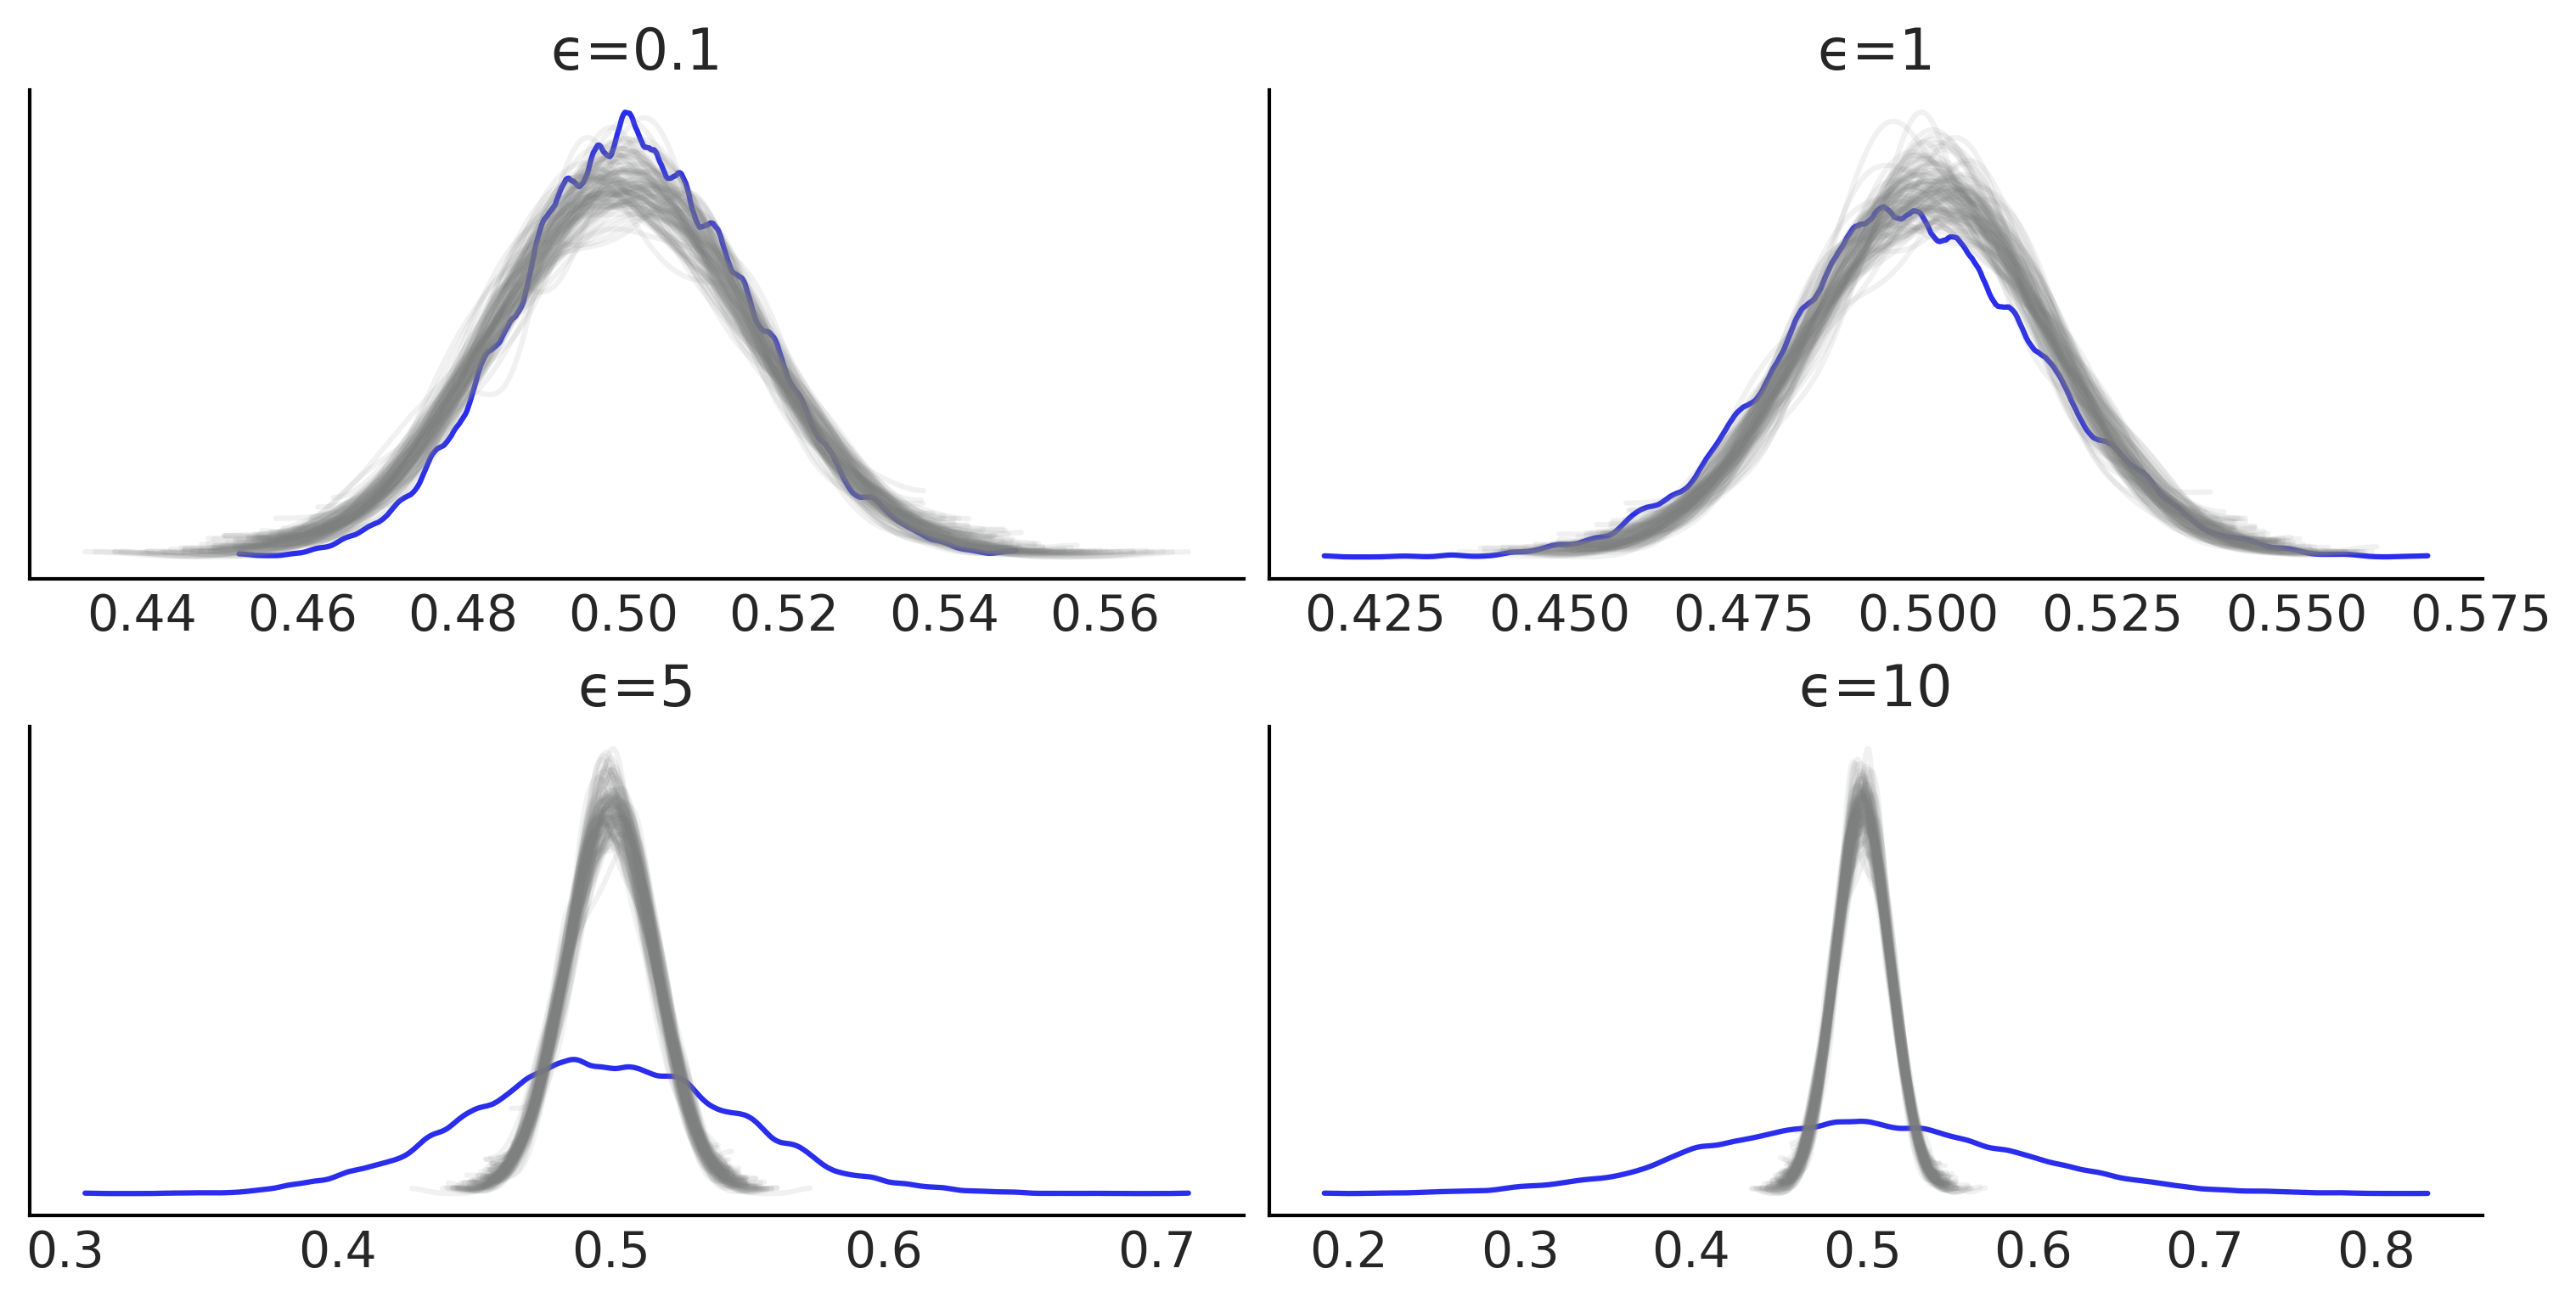

In [12]:
_, ax = plt.subplots(2, 2, figsize=(10,5))

ax = ax.ravel()
for i in range(4):
    az.plot_bpv(idatas_[i], kind="p_value", reference='samples', color="C4", ax=ax[i],
               plot_ref_kwargs={"color":"C2"})
    ax[i].set_title(f"ϵ={epsilons[i]}")
plt.savefig("img/chp08/bpv_g_many_eps_01.png")

/home/osvaldo/proyectos/00_BM/arviz-devs/arviz/arviz/plots/ppcplot.py:240: FutureWarning: color has been deprecated in favor of colors
  warnings.warn("color has been deprecated in favor of colors", FutureWarning)


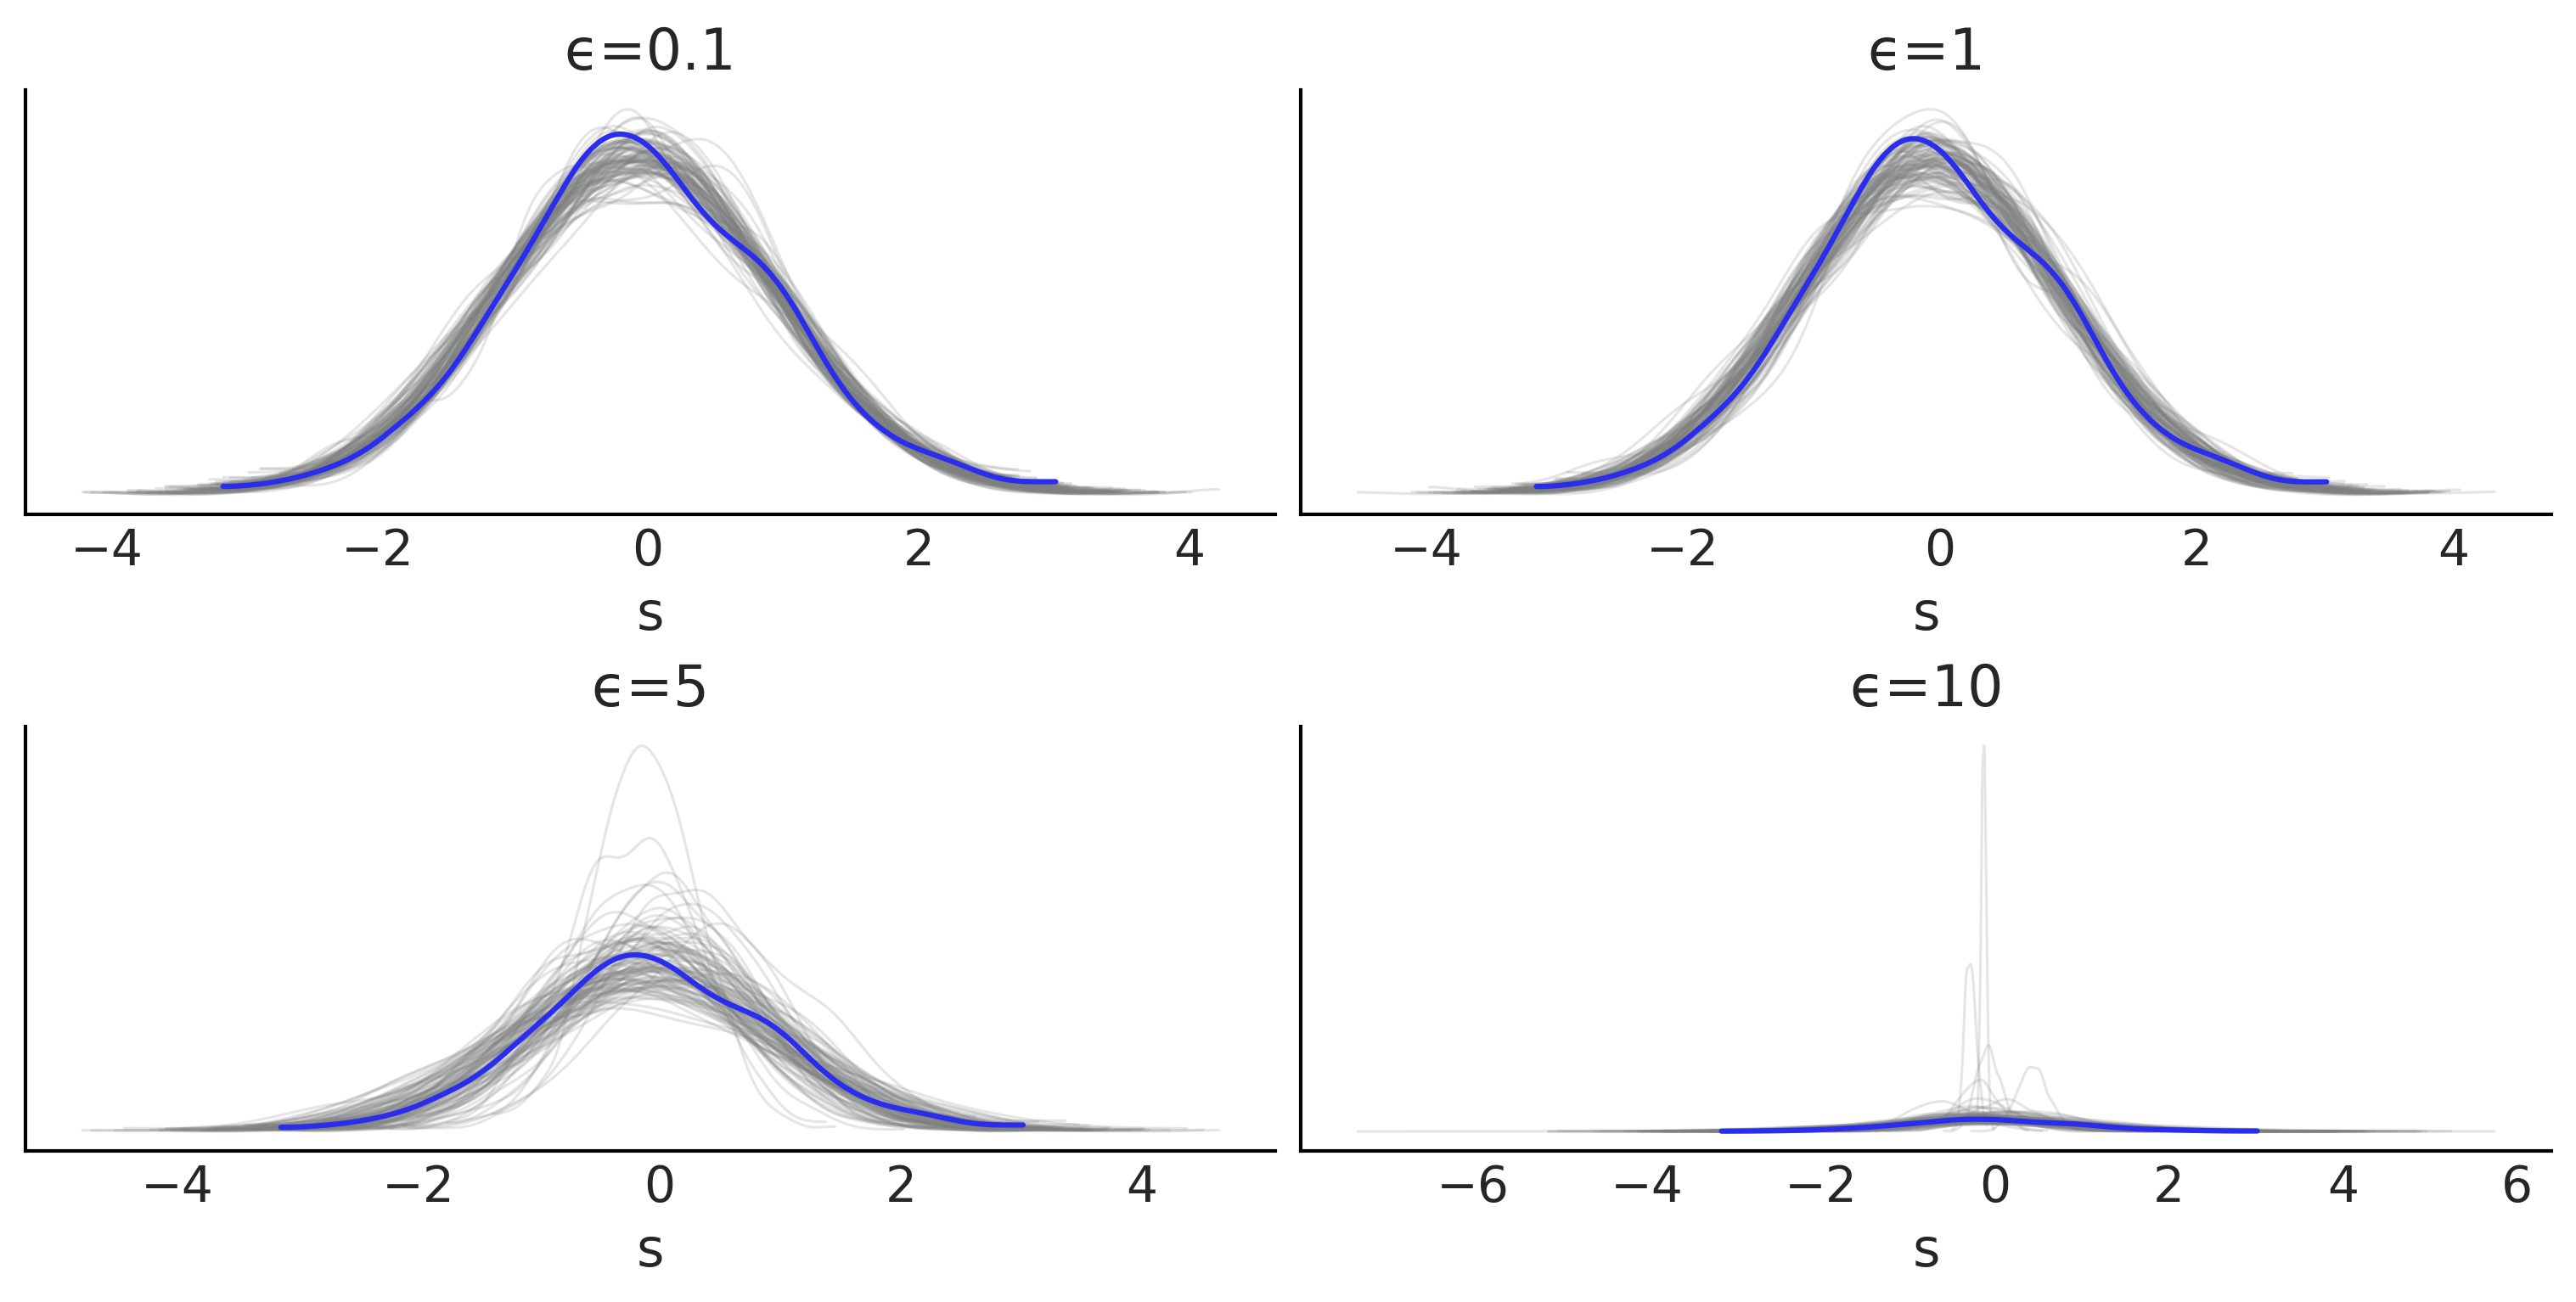

In [13]:
_, axes = plt.subplots(2, 2, figsize=(10,5))

for i, ax in enumerate(axes.ravel()):
    az.plot_ppc(idatas_[i], num_pp_samples=100, ax=ax, color="C2",
                mean=False, legend=False, observed=False)
    az.plot_kde(idatas_[i].observed_data["s"].values, plot_kwargs={"color":"C4"}, ax=ax)
    ax.set_xlabel("s")
    ax.set_title(f"ϵ={epsilons[i]}")
plt.savefig("img/chp08/ppc_g_many_eps.png")

## g-and-k distributions

### Figure 8.9

In [14]:
data = pd.read_csv("../data/air_pollution_bsas.csv")
bsas_co = data["co"].dropna().values

'We have 8 observations larger than 3 ppm'

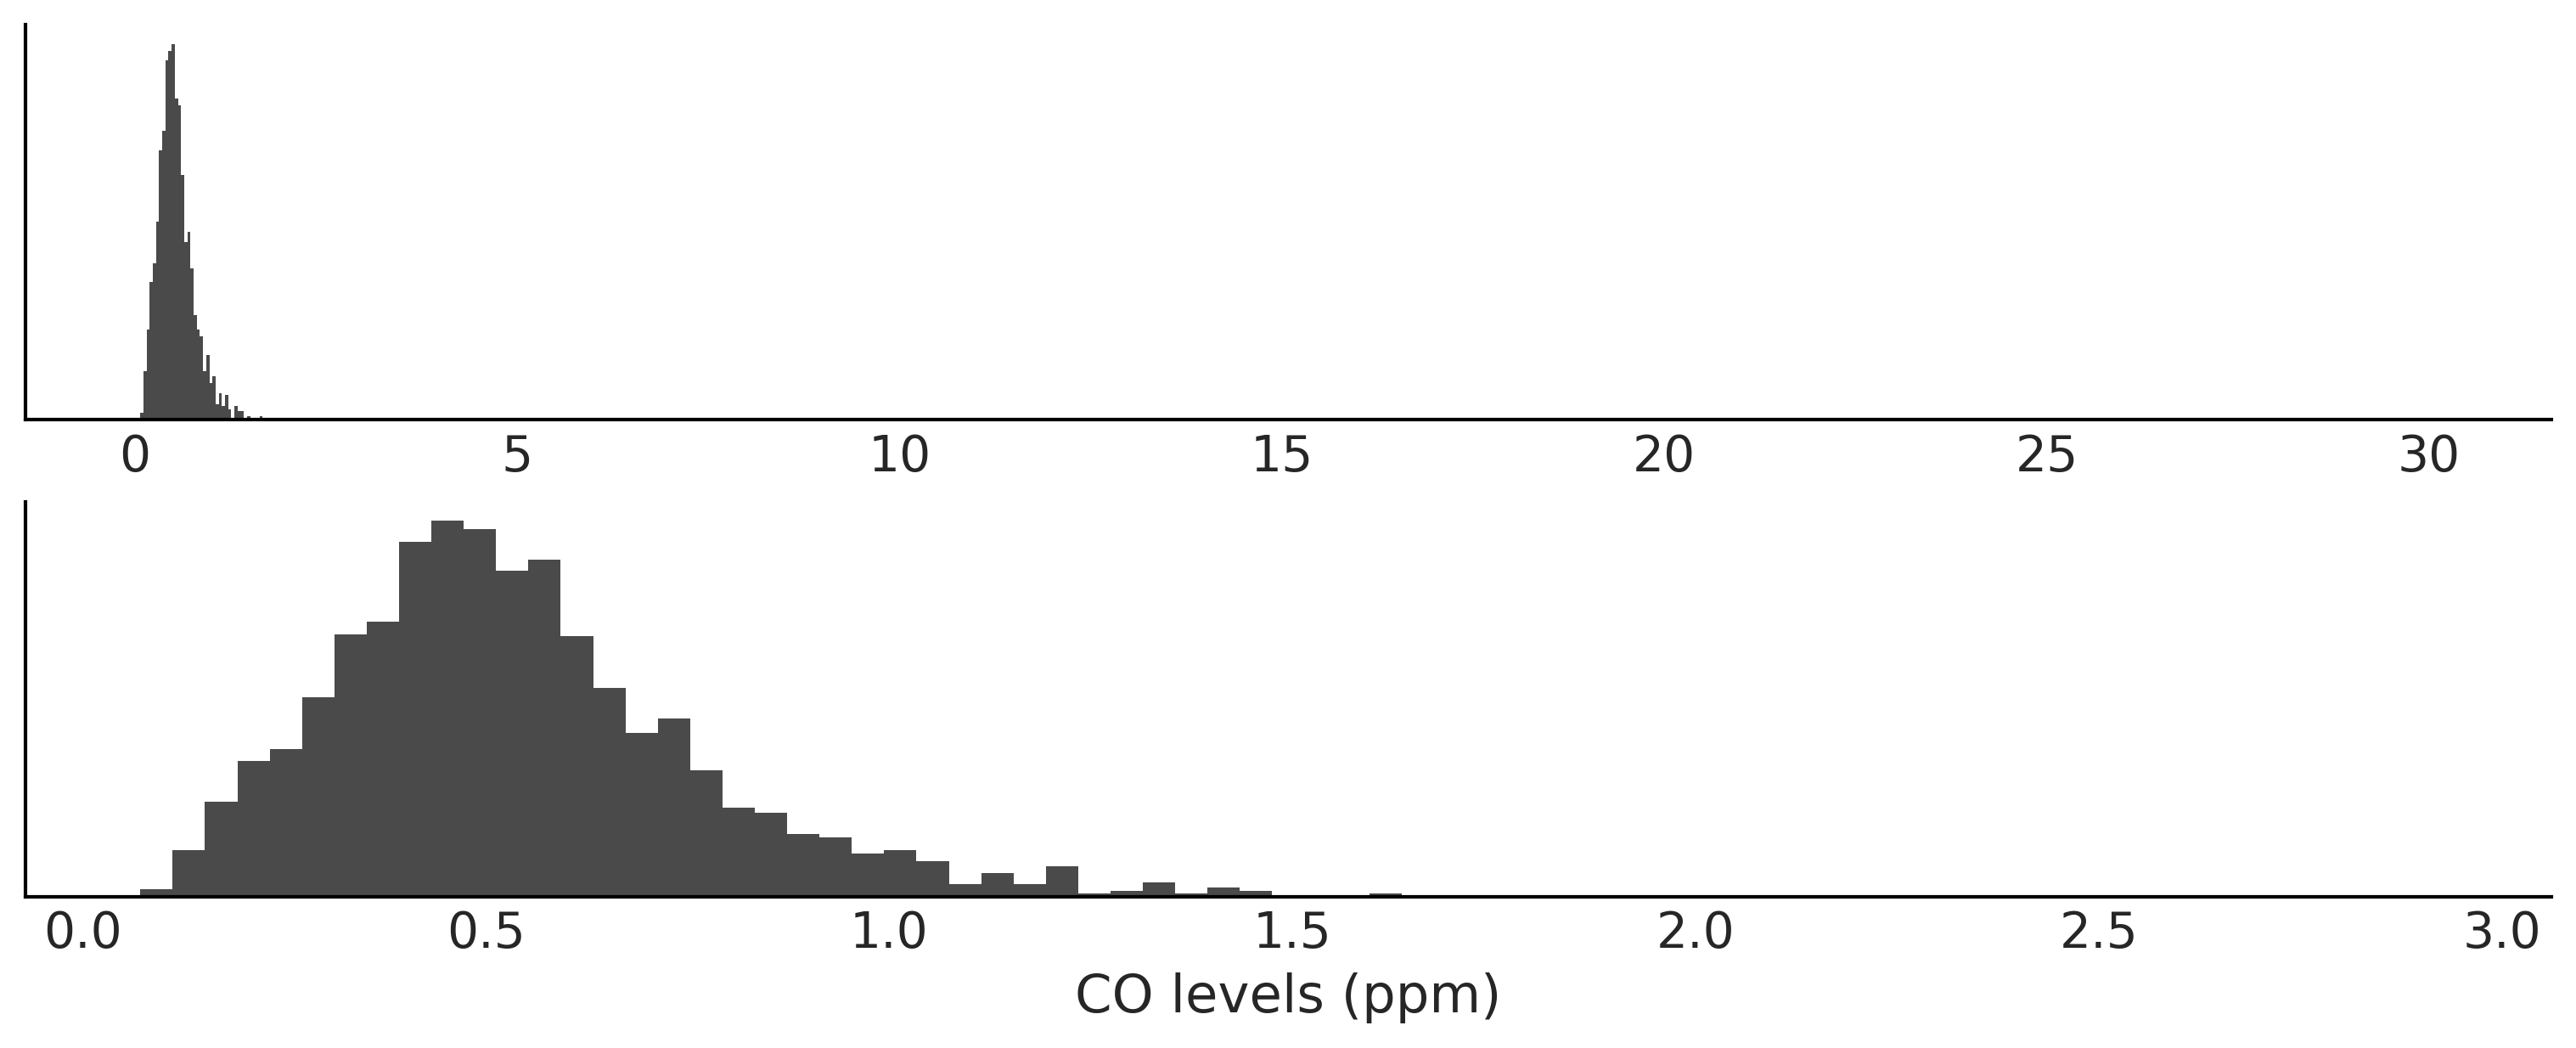

In [15]:
_, axes = plt.subplots(2,1,  figsize=(10,4), sharey=True)
axes[0].hist(bsas_co, bins="auto", color="C1", density=True)
axes[0].set_yticks([])
axes[1].hist(bsas_co[bsas_co < 3], bins="auto", color="C1", density=True)
axes[1].set_yticks([])
axes[1].set_xlabel("CO levels (ppm)")
plt.savefig("img/chp08/co_ppm_bsas.png")
f"We have {sum(bsas_co > 3)} observations larger than 3 ppm"

### Code 8.4 and Figure 8.10

In [16]:
class g_and_k_quantile:
    def __init__(self):
        self.quantile_normal = stats.norm(0, 1).ppf
        self.pdf_normal = stats.norm(0, 1).pdf

    def ppf(self, x, a, b, g, k):
        z = self.quantile_normal(x)
        return a + b * (1 + 0.8 * np.tanh(g*z/2)) * ((1 + z**2)**k) * z

    
    def rvs(self, rng, a, b, g, k, size):
        x = rng.uniform(0, 1, size)
        return self.ppf(x, a, b, g, k)

    def cdf(self, x, a, b, g, k, zscale=False):   
        optimize.fminbound(f, -5, 5)

    def pdf(self, x, a, b, g, k):
        #z = cdf(x, a, b, g, k)
        z = x
        z_sq = z**2
        term1 = (1+z_sq)**k
        term2 = 1+0.8*np.tanh(g*x/2)
        term3 = (1+(2*k+1)*z_sq)/(1+z_sq)
        term4 = 0.8*g*z/(2*np.cosh(g*z/2)**2)

        deriv = b*term1*(term2*term3+term4)
        return self.pdf_normal(x) / deriv

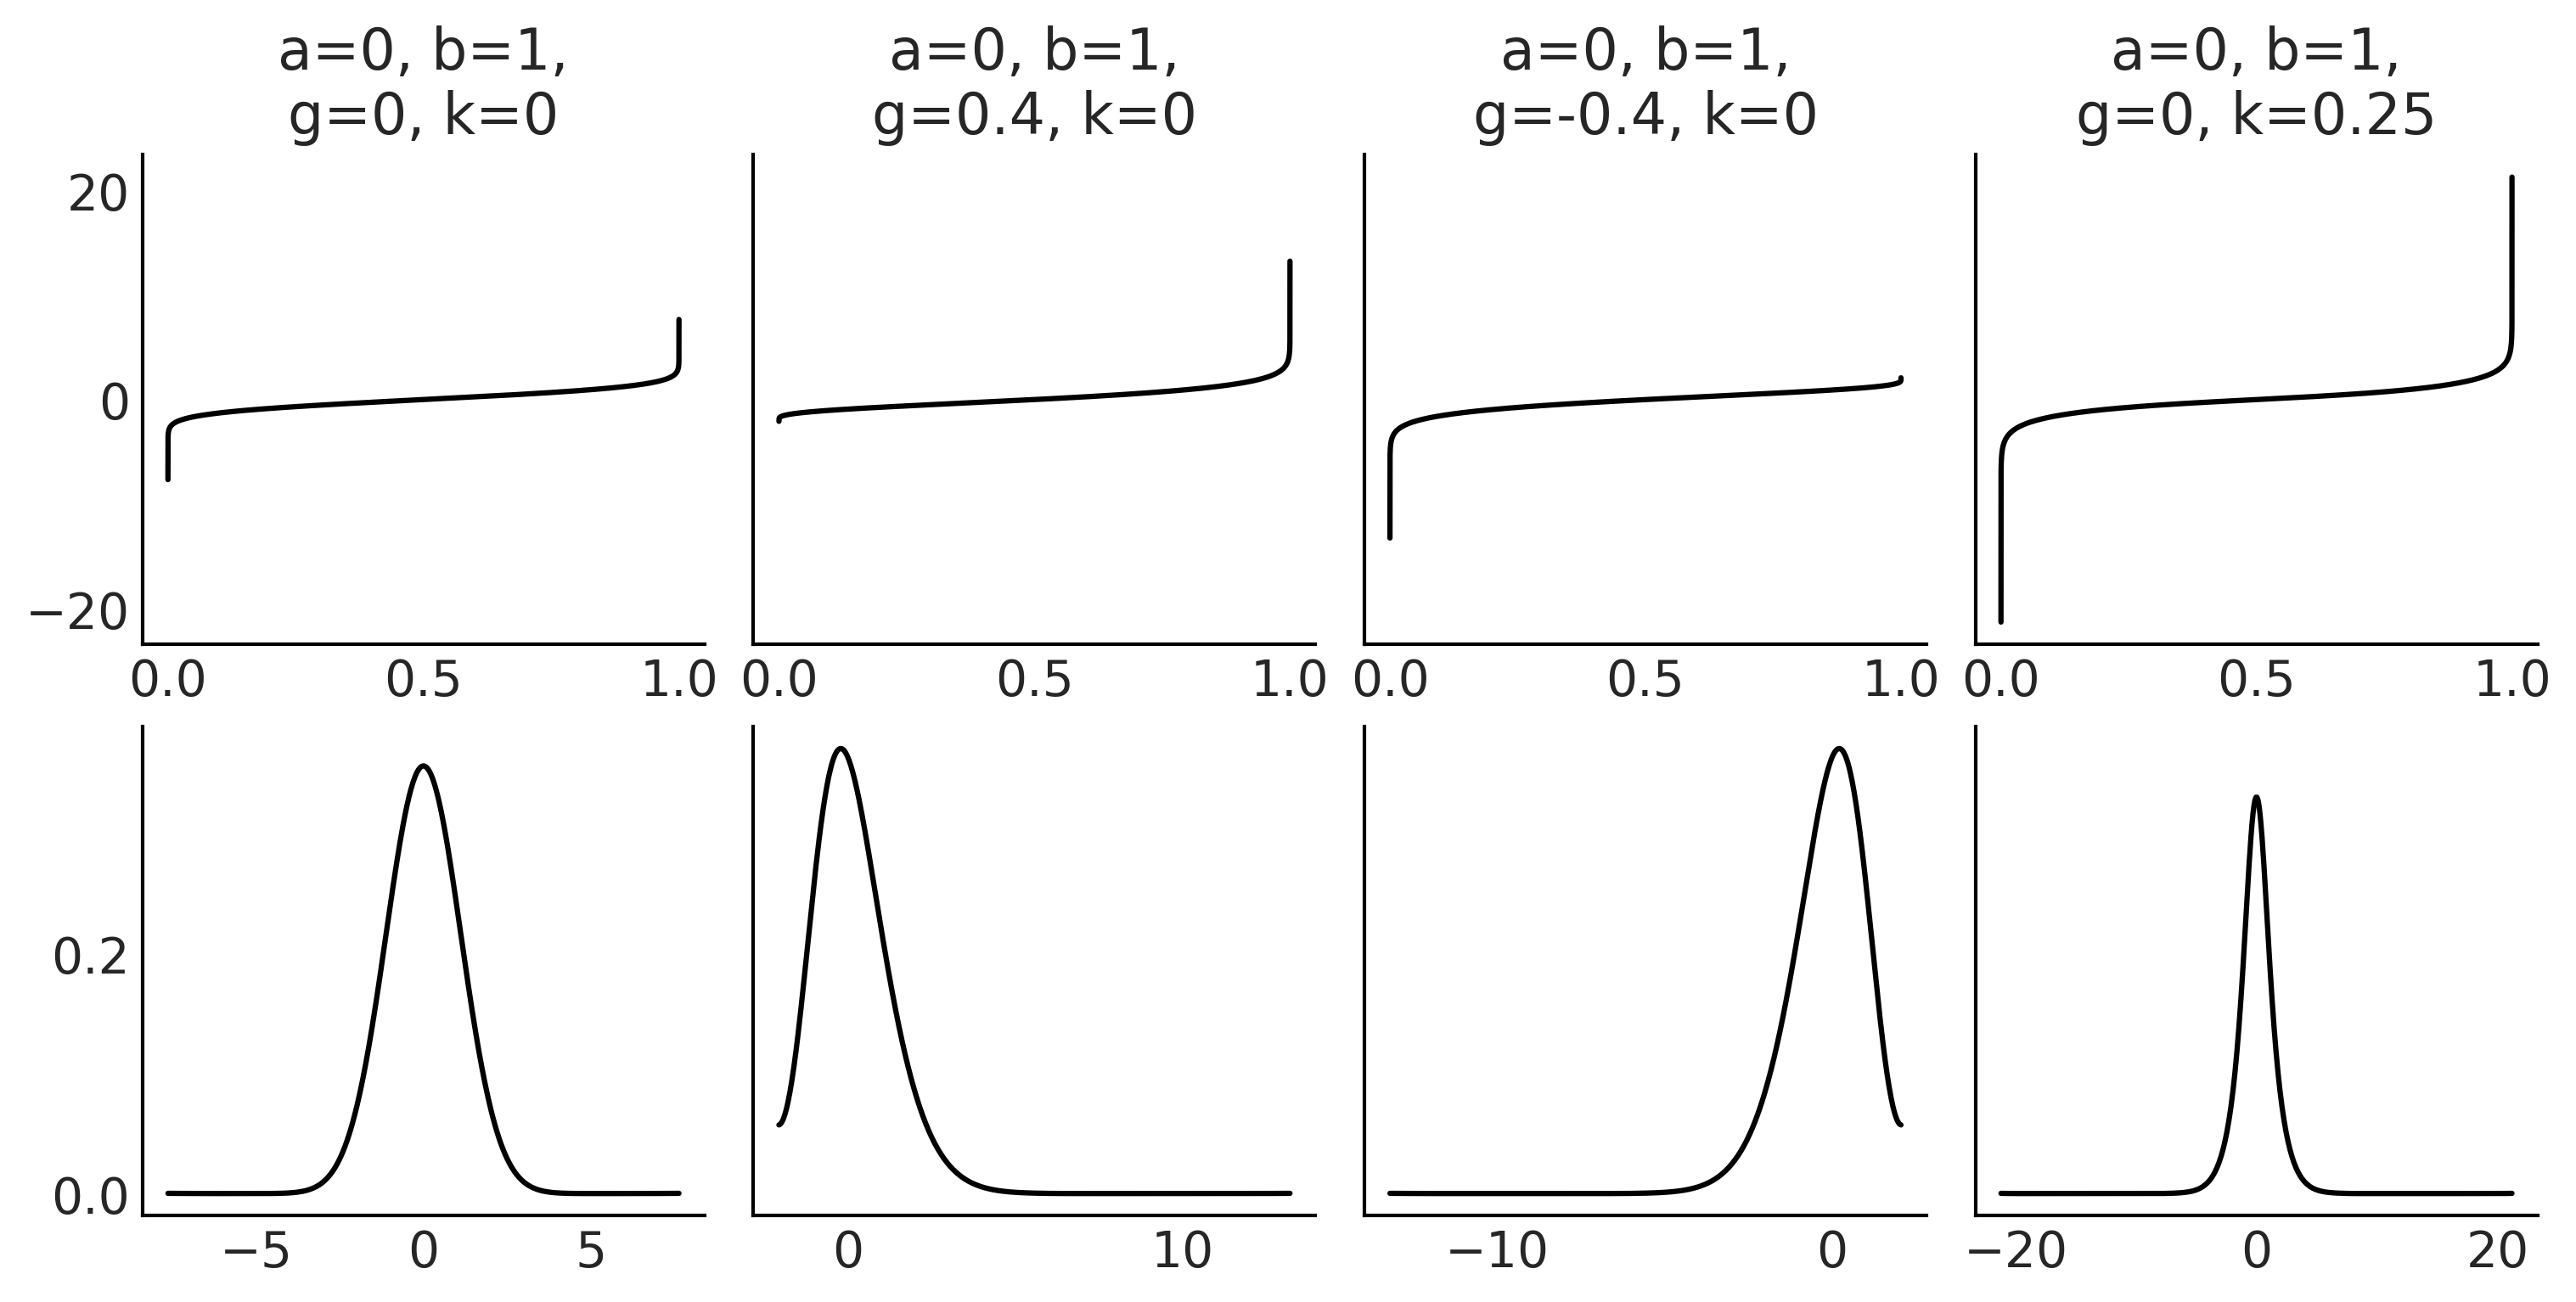

In [17]:
gk = g_and_k_quantile()
u = np.linspace(1E-14, 1-1E-14, 10000)

params = ((0, 1, 0, 0), 
 (0, 1, .4, 0),
 (0, 1,-.4, 0),
 (0, 1, 0, 0.25))

_, ax = plt.subplots(2, 4, sharey="row", figsize=(10, 5))
for i, p in enumerate(params):
    a, b, g, k = p
    ppf = gk.ppf(u, a, b, g, k)
    ax[0, i].plot(u, ppf)
    ax[0, i].set_title(f"a={a}, b={b},\ng={g}, k={k}")
    #ax[1, i].plot(x, gk.pdf(x, a, b, g, k))
    az.plot_kde(ppf, ax=ax[1, i], bw=0.5)
plt.savefig("img/chp08/gk_quantile.png")

### Code 8.5

In [18]:
def octo_summary(x):
    e1, e2, e3, e4, e5, e6, e7 = np.quantile(x, [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875])
    sa = e4
    sb = e6 - e2
    sg = (e6 + e2 - 2*e4)/sb
    sk = (e7 - e5 + e3 - e1)/sb
    return np.array([sa, sb, sg, sk])

### Code 8.6

In [19]:
gk = g_and_k_quantile()
def gk_simulator(rng, a, b, g, k, size=None):
    return gk.rvs(rng, a, b, g, k, len(bsas_co))

### Code 8.7 and Figure 8.11

In [20]:
with pm.Model() as gkm:
    a = pm.HalfNormal('a', sigma=1)
    b = pm.HalfNormal('b', sigma=1)
    g = pm.HalfNormal('g', sigma=1)
    k = pm.HalfNormal('k', sigma=1)
    
    s = pm.Simulator('s', gk_simulator, params=[a, b, g, k],        
                     sum_stat=octo_summary,
                     epsilon=0.1,
                     observed=bsas_co)
    
    idata_gk = pm.sample_smc()
    idata_gk.extend(pm.sample_posterior_predictive(idata_gk))

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


Sampling: [s]


In [21]:
az.summary(idata_gk)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a  0.503  0.101   0.315    0.692      0.001    0.001    7162.0    7490.0   
b  0.195  0.070   0.060    0.322      0.001    0.001    7510.0    7070.0   
g  0.443  0.286   0.002    0.944      0.003    0.002    4034.0    2263.0   
k  0.147  0.089   0.001    0.298      0.001    0.001    4391.0    2441.0   

   r_hat  
a    1.0  
b    1.0  
g    1.0  
k    1.0

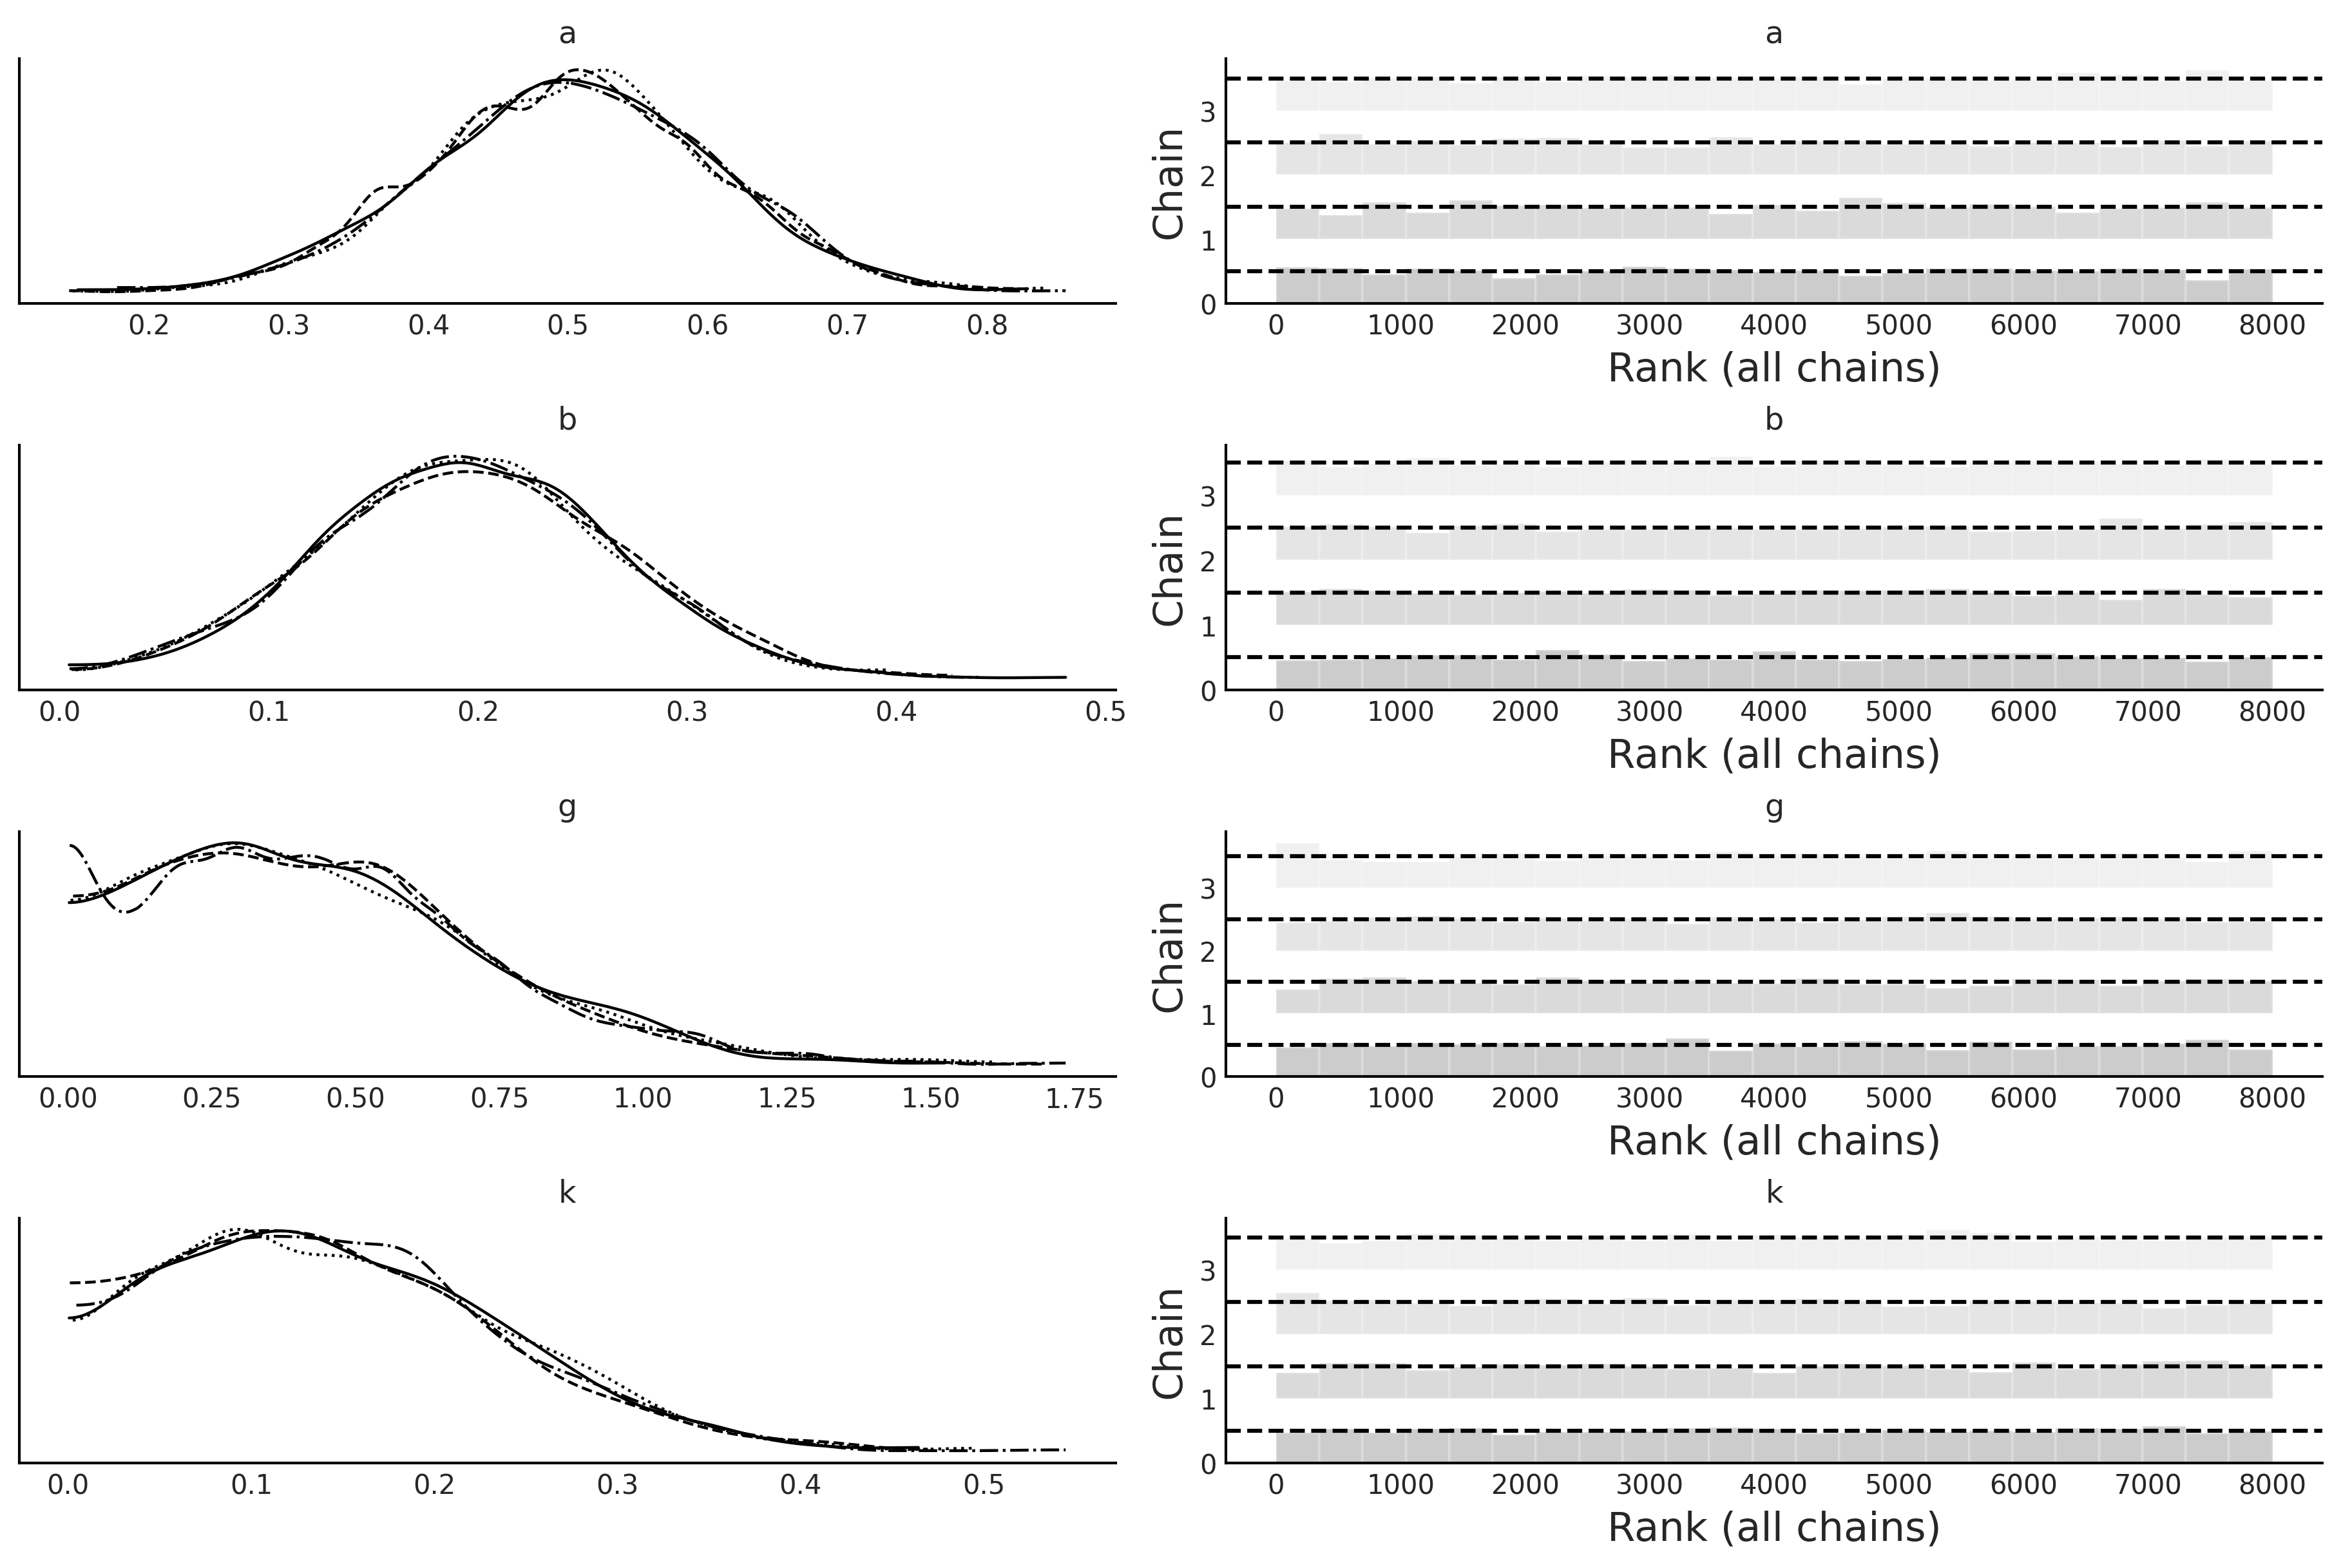

In [22]:
az.plot_trace(idata_gk, kind="rank_bars")
plt.savefig("img/chp08/trace_gk.png")

In [23]:
axes = az.plot_pair(idata_gk, 
                    kind="kde", 
                    marginals=True,
                    textsize=45,
                    kde_kwargs={"contourf_kwargs":{"cmap":plt.cm.viridis}},
                    )

for ax, pad in zip(axes[:,0], (70, 30, 30, 30)):
    ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=pad)

plt.savefig("img/chp08/pair_gk.png")

## Approximating moving averages

### Code 8.8 and Figure 8.12

In [24]:
def moving_average_2(θ1, θ2, n_obs=500):
    λ = np.random.normal(0, 1, n_obs+2)
    y = λ[2:] + θ1*λ[1:-1] + θ2*λ[:-2]
    return y

We are calling the simulator one more time to generate "observed data".

In [25]:
θ1_true = 0.6
θ2_true = 0.2
y_obs = moving_average_2(θ1_true, θ2_true)

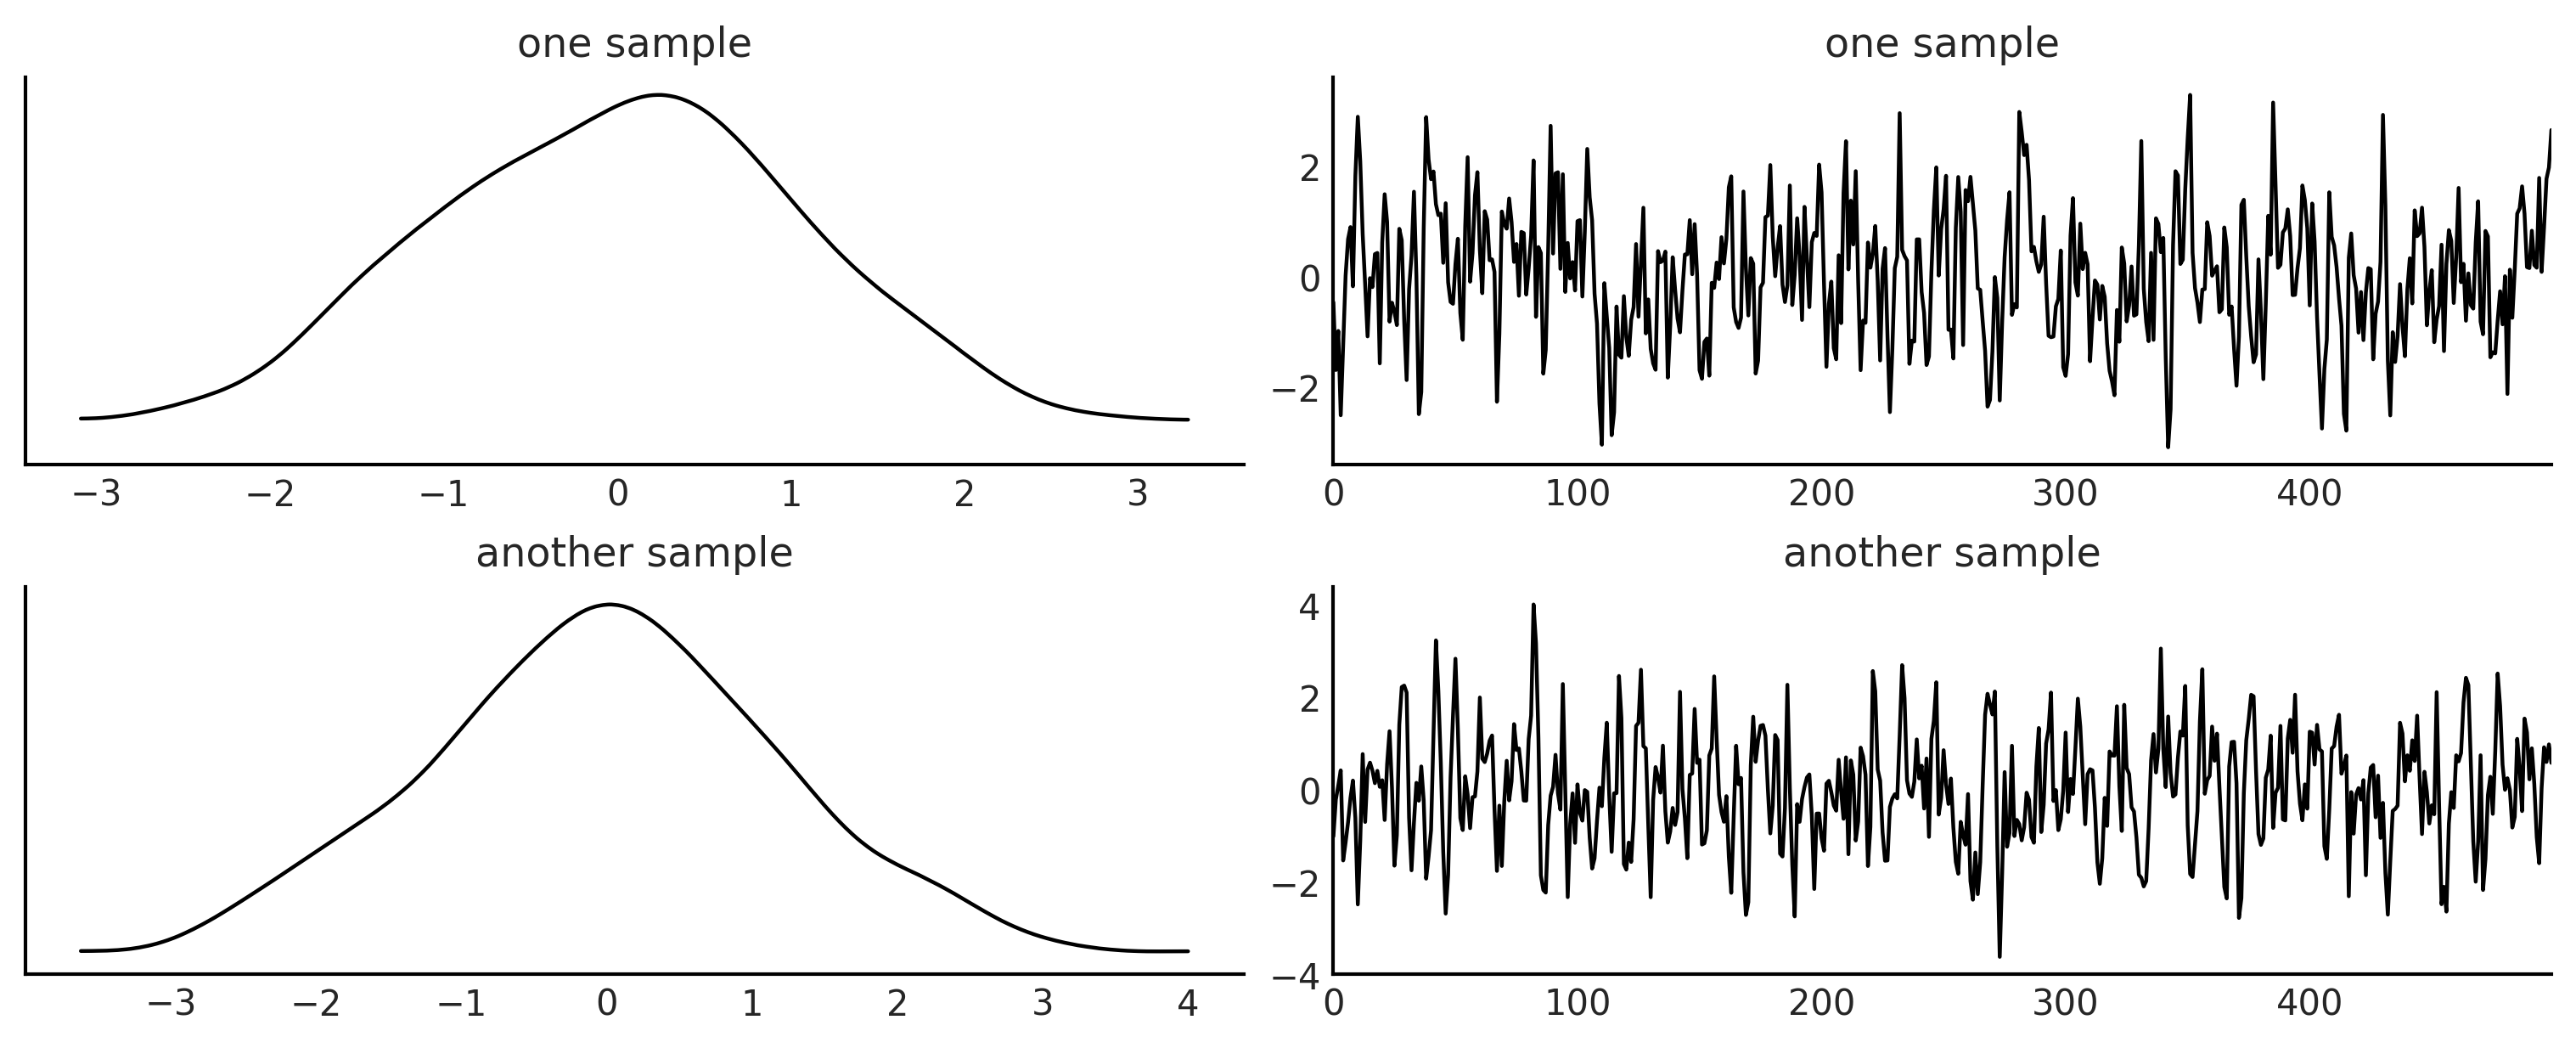

In [26]:
az.plot_trace({'one sample':moving_average_2(θ1_true, θ2_true),
               'another sample':moving_average_2(θ1_true, θ2_true)},
              trace_kwargs={'alpha':1},
              figsize=(10, 4)
             )
plt.savefig("img/chp08/ma2_simulator_abc.png")

### Code 8.9

In [27]:
def autocov(x):
    a = np.mean(x[1:] * x[:-1])
    b = np.mean(x[2:] * x[:-2])
    return np.array((a, b))


def moving_average_2(rng, θ1, θ2, size=500):
    λ = rng.normal(0, 1, size[0]+2)
    y = λ[2:] + θ1*λ[1:-1] + θ2*λ[:-2]
    return y

### Code 8.10 and Figure 8.13

In [28]:
with pm.Model() as model_ma2:
    θ1 = pm.Uniform('θ1', -2, 2)
    θ2 = pm.Uniform('θ2', -1, 1)
    p1 = pm.Potential("p1", pm.math.switch(θ1+θ2 > -1, 0, -np.inf))
    p2 = pm.Potential("p2", pm.math.switch(θ1-θ2 < 1, 0, -np.inf))

    y = pm.Simulator('y', moving_average_2,
                     params=[θ1, θ2],
                     sum_stat=autocov,
                     epsilon=0.1,
                     observed=y_obs)

    trace_ma2 = pm.sample_smc(3000)

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


In [29]:
az.summary(trace_ma2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
θ1  0.667  0.106   0.464    0.860      0.001    0.001   11369.0   10573.0   
θ2  0.393  0.145   0.128    0.676      0.001    0.001   10848.0    9272.0   

    r_hat  
θ1    1.0  
θ2    1.0

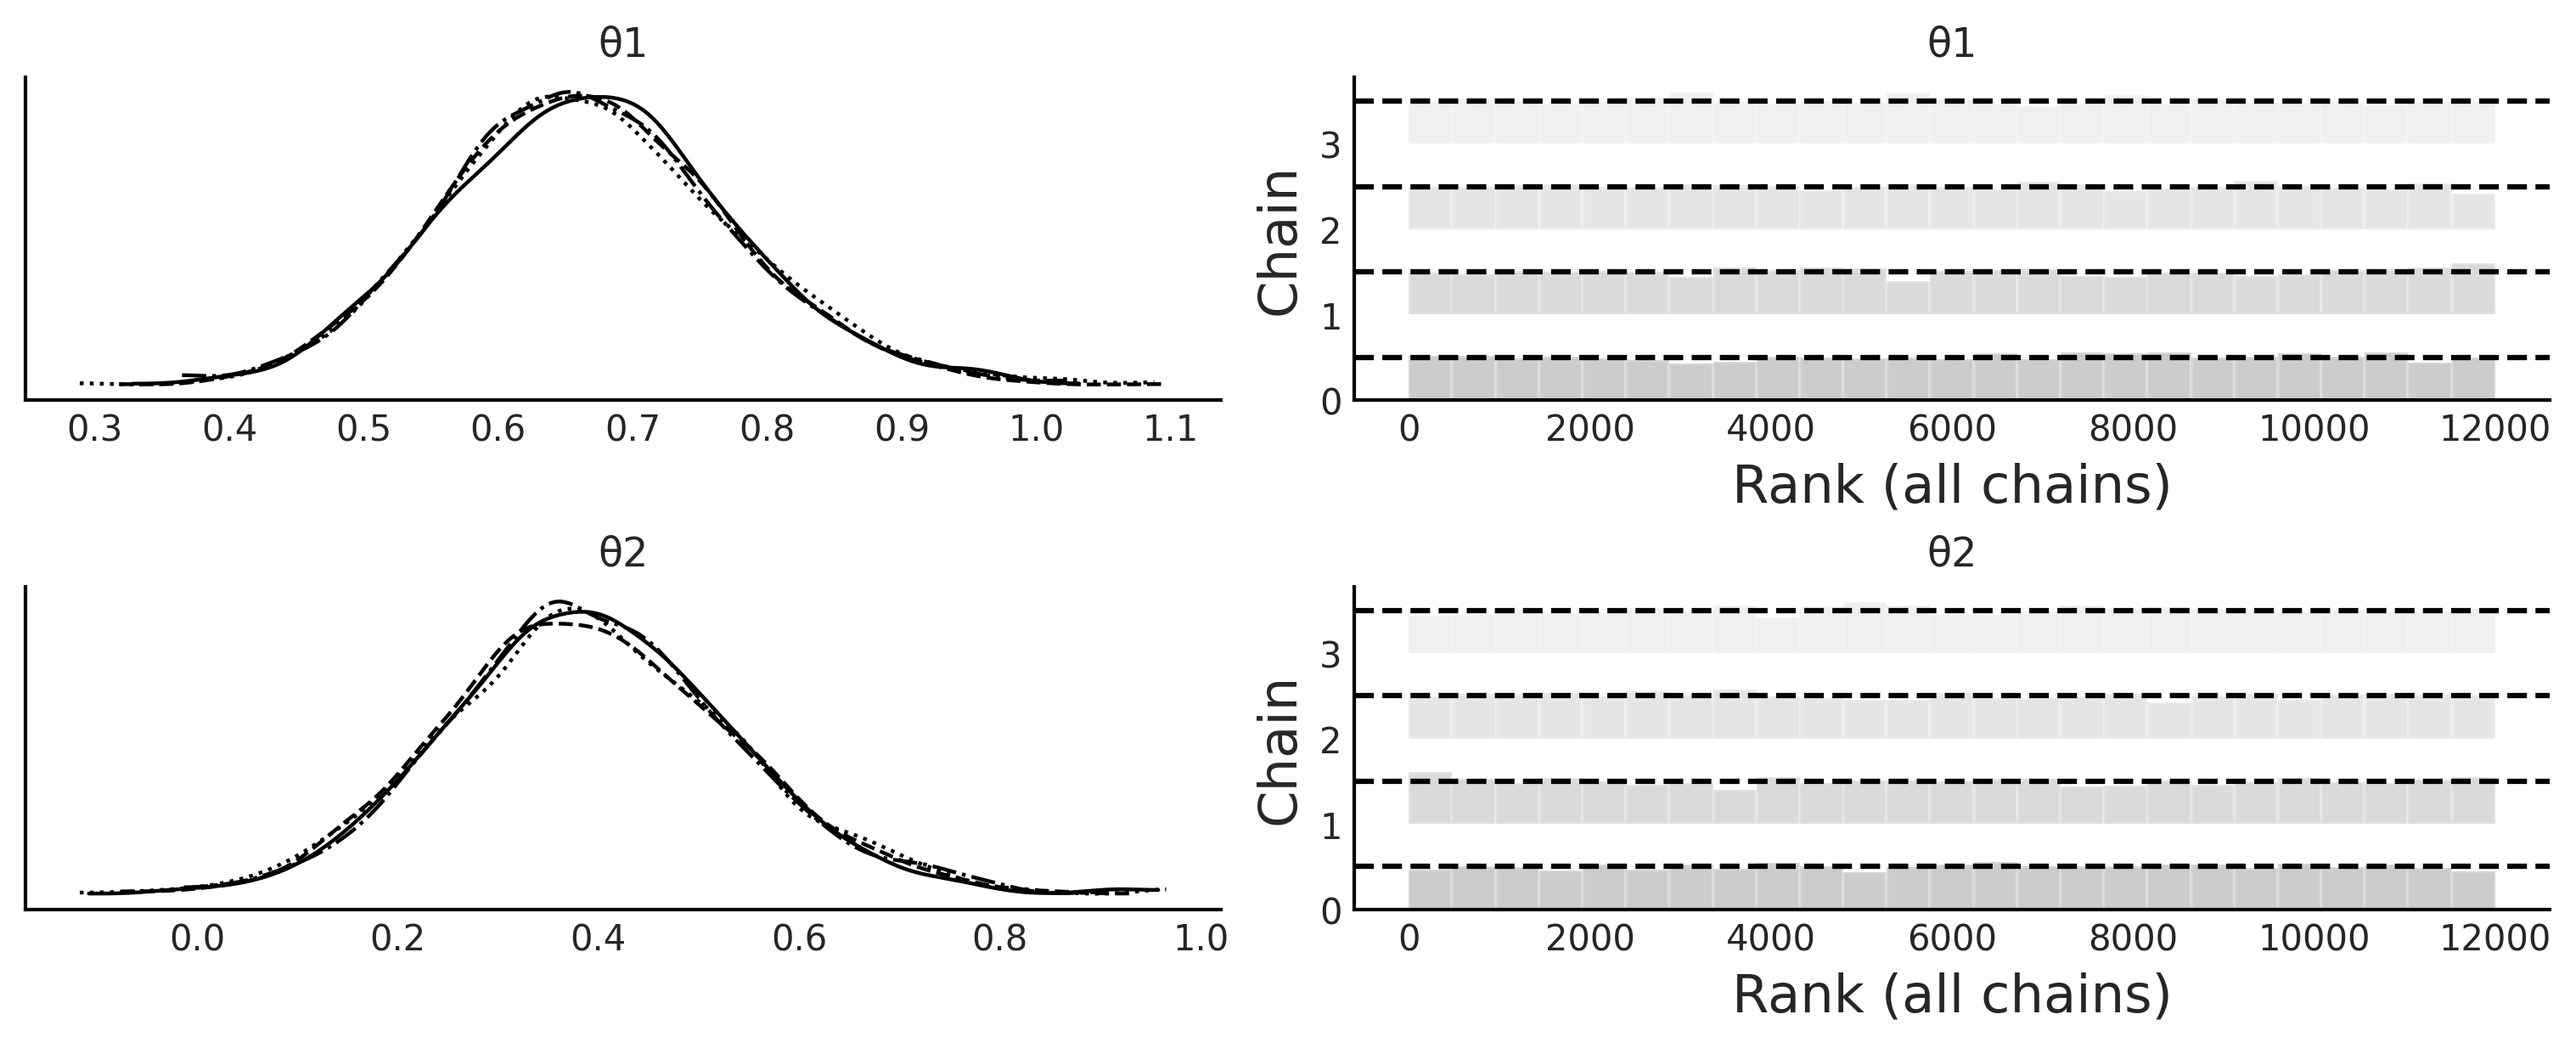

In [30]:
az.plot_trace(trace_ma2, kind="rank_bars", figsize=(10, 4))
plt.savefig("img/chp08/ma2_trace.png")

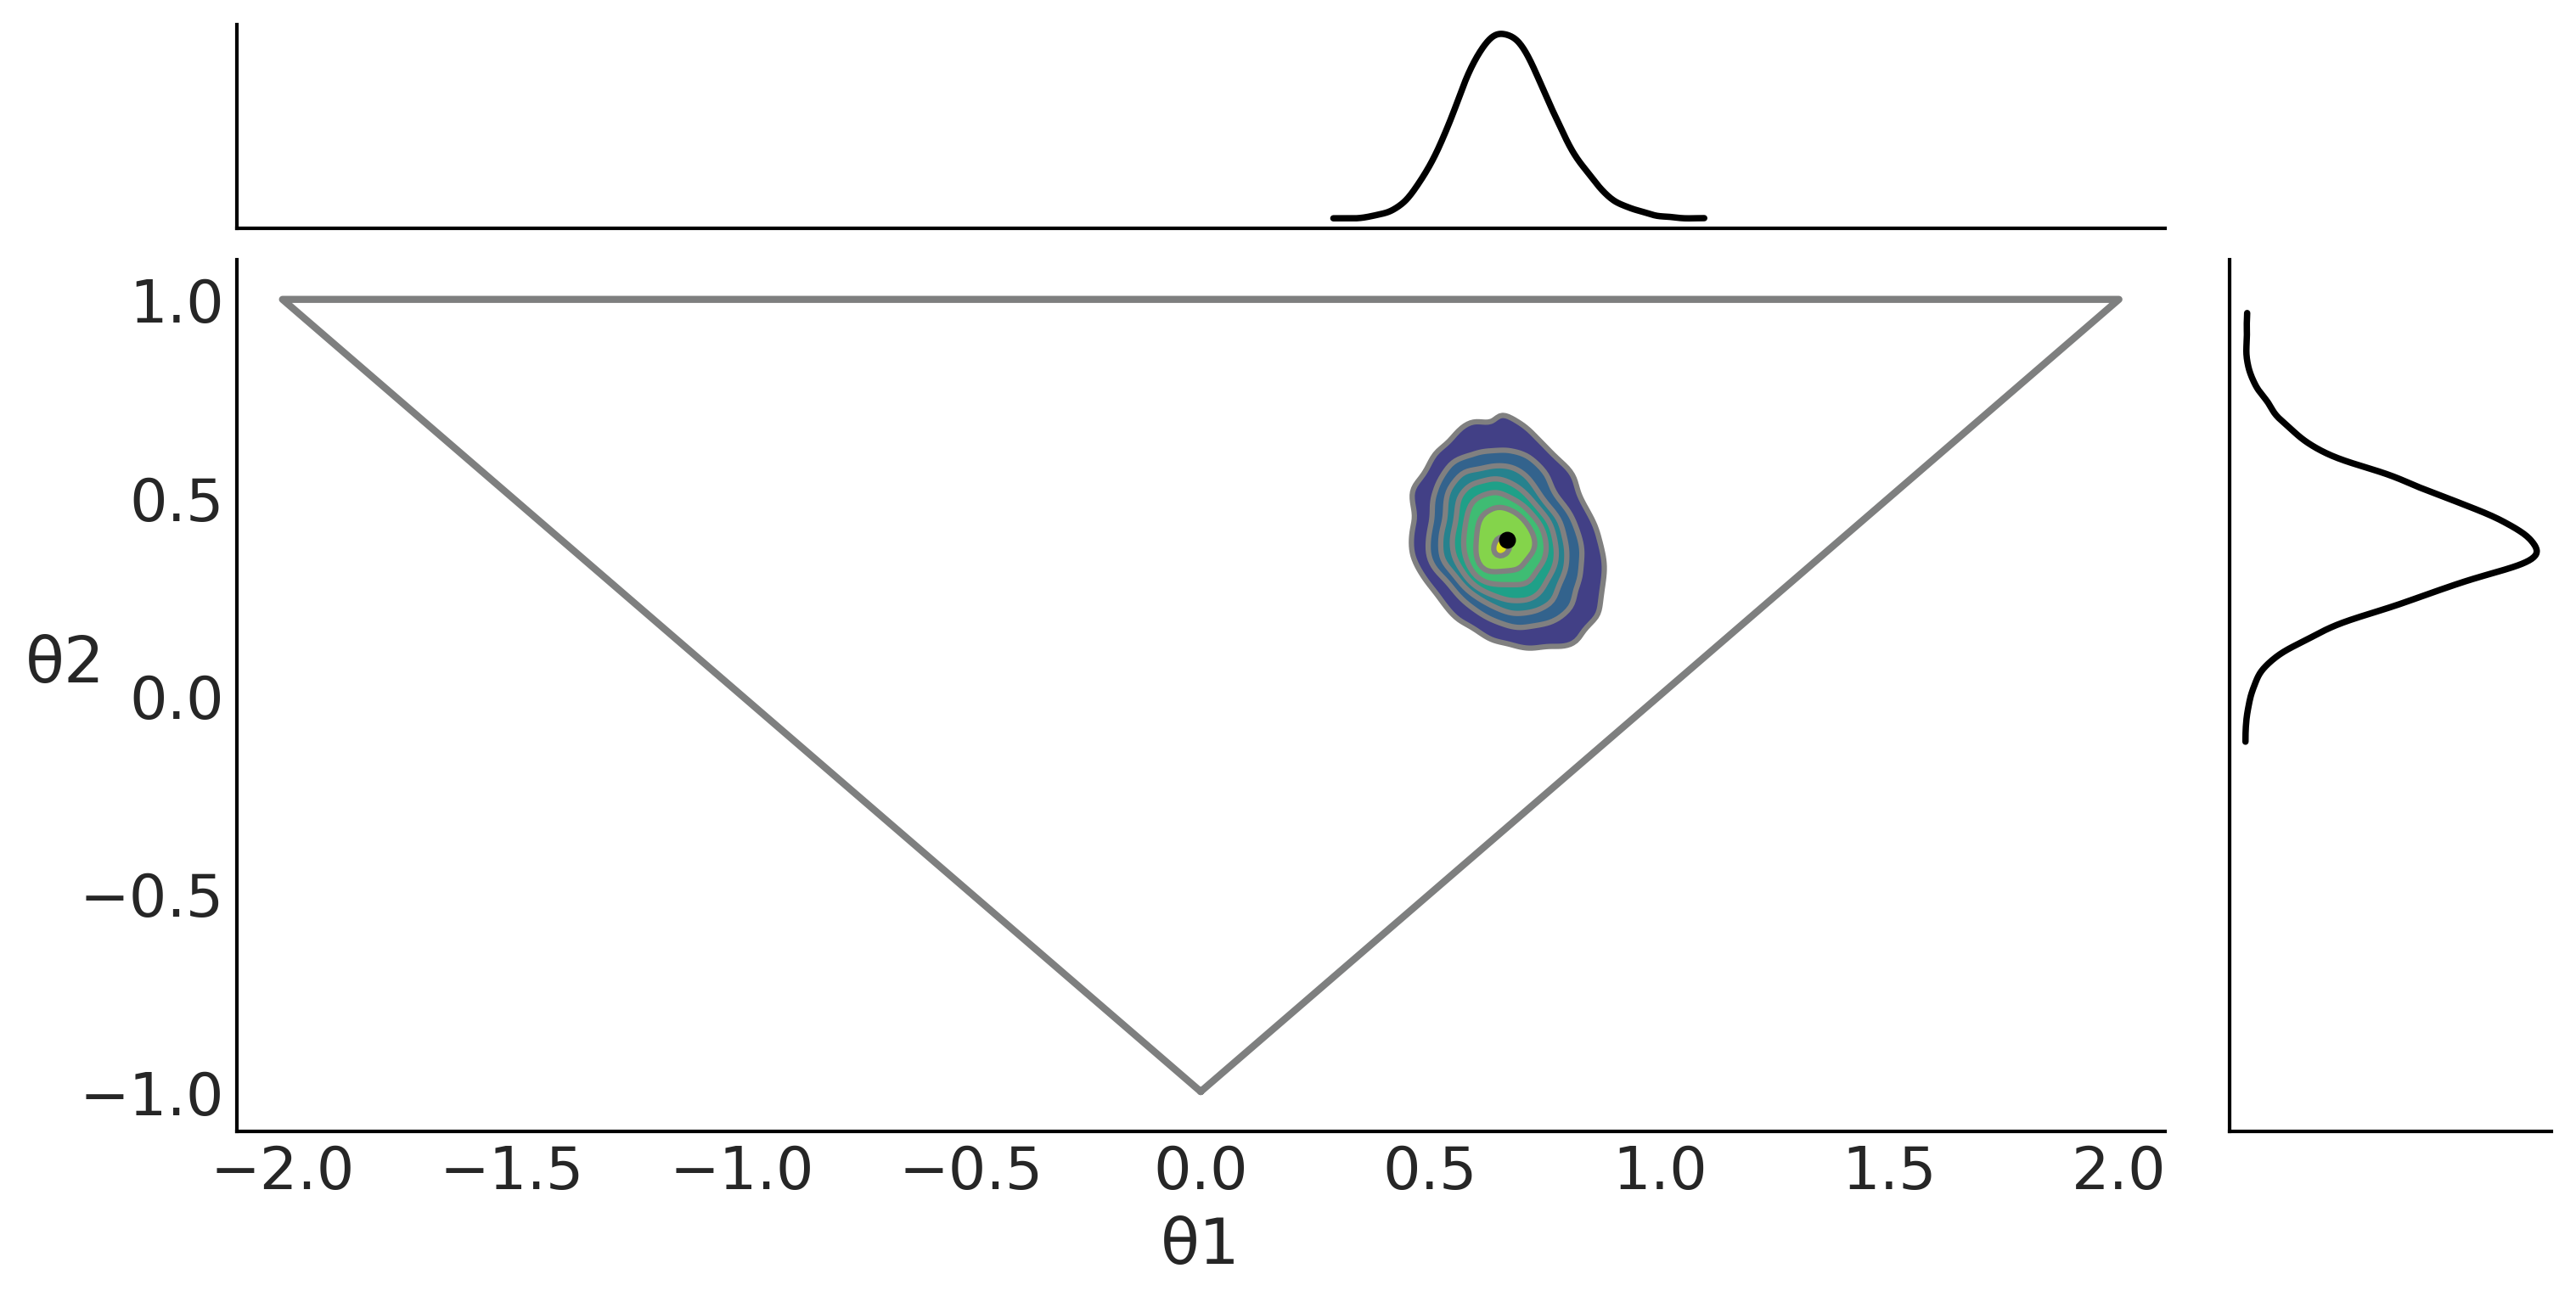

In [31]:
axes = az.plot_pair(trace_ma2, kind="kde", var_names=["θ1", "θ2"],
                    marginals=True, figsize=(10,5),
                    kde_kwargs={"contourf_kwargs":{"cmap":plt.cm.viridis}},
                    point_estimate="mean",
                    point_estimate_kwargs={"ls":"none"},
                    point_estimate_marker_kwargs={"marker":".",
                                                  "facecolor":"k",
                                                  "zorder":2})

axes[1,0].set_xlim(-2.1, 2.1)
axes[1,0].set_ylim(-1.1, 1.1)
axes[1,0].set_ylabel(axes[1,0].get_ylabel(), rotation=0)
axes[1,0].plot([0, 2, -2, 0], [-1, 1, 1, -1], "C2", lw=2)
plt.savefig("img/chp08/ma2_triangle.png")

## Model Comparison in the ABC context

To reproduce the figures in the book, run `loo_abc.py`

##  Model choice via random forest

In [40]:
def moving_average_1(rng, θ1, size=(500,)):
    λ = rng.normal(0, 1, size[0]+1)
    y = λ[2:] + θ1*λ[1:-1]
    return y

def moving_average_2(rng, θ1, θ2, size=(500,)):
    λ = rng.normal(0, 1, size[0]+2)
    y = λ[2:] + θ1*λ[1:-1] + θ2*λ[1:-1]
    return y

rng = np.random.default_rng(1346)
θ1_true = 0.7
θ2_true = 0.3
y_obs = moving_average_2(rng, θ1_true, θ2_true)

In [41]:
def autocov(x, n=2):
    return np.array([np.mean(x[i:] * x[:-i]) for i in range(1, n+1)])

### Code 8.12

In [42]:
with pm.Model() as model_ma1:
    θ1 = pm.Uniform('θ1', -2, 2)
    y = pm.Simulator('y', moving_average_1,
                     params=[θ1], sum_stat=autocov, epsilon=0.2, observed=y_obs)
    idata_ma1 = pm.sample_smc(3000, idata_kwargs={"log_likelihood":True})

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


/home/osvaldo/proyectos/00_BM/arviz-devs/arviz/arviz/data/base.py:221: UserWarning: More chains (4) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


In [44]:
with pm.Model() as model_ma2:
    θ1 = pm.Uniform('θ1', -2, 2)
    θ2 = pm.Uniform('θ2', -1, 1)
    p1 = pm.Potential("p1", pm.math.switch(θ1+θ2 > -1, 0, -np.inf))
    p2 = pm.Potential("p2", pm.math.switch(θ1-θ2 < 1, 0, -np.inf))

    y = pm.Simulator('y', moving_average_2,
                     params=[θ1, θ2],
                     sum_stat=autocov,
                     epsilon=0.1,
                     observed=y_obs)

    idata_ma2 = pm.sample_smc(3000, idata_kwargs={"log_likelihood":True})

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


In [45]:
mll_ma2 = np.nanmean(np.concatenate([np.hstack(v) for v in idata_ma2.sample_stats.log_marginal_likelihood.values]))
mll_ma1 = np.nanmean(np.concatenate([np.hstack(v) for v in idata_ma1.sample_stats.log_marginal_likelihood.values]))

mll_ma2/mll_ma1

1.8310588978075684

### Code 8.13

In [46]:
cmp = az.compare({"model_ma1":idata_ma1, "model_ma2":idata_ma2})
cmp

/home/osvaldo/proyectos/00_BM/arviz-devs/arviz/arviz/stats/stats.py:1039: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/home/osvaldo/proyectos/00_BM/arviz-devs/arviz/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/osvaldo/proyectos/00_BM/arviz-devs/arviz/arviz/stats/stats.py:1039: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/home/osvaldo/proyectos/00_BM/arviz-devs/arviz/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or m

rank   elpd_loo      p_loo  elpd_diff  weight        se       dse  \
model_ma1     0 -14.451310  13.333599   0.000000     1.0  7.476536  0.000000   
model_ma2     1 -57.201257  54.961738  42.749947     0.0  9.566998  2.090461   

           warning scale  
model_ma1     True   log  
model_ma2     True   log

### Code 8.14

In [ ]:
from functools import partial
select_model([(model_ma1, idata_ma1), (model_ma2, idata_ma2)], 
             statistics=[partial(autocov, n=6)],
             n_samples=10000,
             observations=y_obs)